# Caravans for sale

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import re
import warnings

In [2]:
# Importing ML libraries
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Bokeh Libraries
from bokeh.models import ColumnDataSource

In [3]:
warnings.filterwarnings('ignore')

##### DS Firstview

website_ads_ad Dataset downloaded on 08-08-2023

In [4]:
df1 = pd.read_csv('/Users/rajathadri_as/Documents/Sep01_2023.csv')

In [5]:
df1.shape

(20632, 359)

website_ads_ad Dataset downloaded on 01-08-2023

In [6]:
df2 = pd.read_csv('/Users/rajathadri_as/Documents/Sep29_2023.csv')

In [7]:
df2.shape

(20194, 360)

In [8]:
df1_id = df1[['id']]
df2_id = df2[['id']]

In [9]:
df2_id.shape

(20194, 1)

In [29]:
# Merge df2 with df1 on 'id' column
merged = df2_id.merge(df1_id, on='id', how='left', indicator=True)

# Select the entries that are present in df2 but not in df1
entries_only_in_df2 = merged[merged['_merge'] == 'right_only']

In [30]:
merged.shape

(20194, 2)

In [31]:
merged

id     _merge
0      1311488       both
1      1312256       both
2      1315584       both
3      1316352       both
4       859904       both
...        ...        ...
20189  1353983       both
20190  1362175       both
20191  1367039  left_only
20192  1369087  left_only
20193  1177855       both

[20194 rows x 2 columns]

In [32]:
missing_Entries = merged[merged['_merge'] != 'both']

In [33]:
missing_Entries.to_excel('missingEntriesId.xlsx', index=False) 

In [34]:
missing_Entries.id.unique()

array([1364480, 1366016, 1366784, ..., 1369342, 1367039, 1369087],
      dtype=int64)

In [35]:
len(missing_Entries.id.unique())

2109

In [38]:
# Merge df1 with missing_Entries based on 'id' column
common_entries_df = df2.merge(missing_Entries, on='id', how='inner')

In [39]:
common_entries_df

id  main_id  item_type_id                                  guid  \
0     1364480        0             0  af3cb846-2089-4d7a-a50f-9d6a35497144   
1     1366016        0             0  55005631-6517-4f49-a171-ae8d3d2a4248   
2     1366784        0             0  215f57c5-a833-4064-ac8d-c446017b2a04   
3     1367552        0             0  2dbf0065-2dc4-4347-b58a-ff378ee94915   
4     1369600        0             0  5b263aa3-a988-41ef-8eff-e02df247b4d2   
...       ...      ...           ...                                   ...   
2104  1365758        0             1  1705ed18-7ed9-43bb-9e38-9a223ef5c95e   
2105  1368574  1361404             1  f375db7a-48b7-45a6-bcff-0904f5aac691   
2106  1369342  1357781             1  9291de0e-c57d-408c-8af4-7d4671d8bf8e   
2107  1367039  1301342             1  4f94d86f-d650-43a9-9f86-533facb9d9b8   
2108  1369087  1361845             1  123c5c26-03a2-4113-b90f-0b8a033a741e   

      supertype_id                        paa_step1  type_id  \
0                0                              NaN        7   
1                0                              NaN        7   
2                0                              NaN        7   
3                0                              NaN        1   
4                0                              NaN        7   
...            ...                              ...      ...   
2104             0  type_id:1;cat_id:76;make_id:112        1   
2105             0    type_id:2;cat_id:67;make_id:9        2   
2106             0               type_id:5;cat_id:2        5   
2107             0              type_id:5;cat_id:18        5   
2108             0  type_id:1;cat_id:76;make_id:196        1   

             type_name  type_import  cat_id  ... days_running  score  \
0           Motorhomes            0       0  ...            0      0   
1           Motorhomes            0       0  ...            0      0   
2           Motorhomes            0       0  ...            0      0   
3     Touring Caravans            0      76  ...            0      0   
4           Motorhomes            0       0  ...            0      0   
...                ...          ...     ...  ...          ...    ...   
2104  Touring Caravans            0      76  ...            0      0   
2105   Static Caravans            0      67  ...            0      0   
2106       Accessories            0       2  ...            0      0   
2107       Accessories            0      18  ...            0      0   
2108  Touring Caravans            0      76  ...            0      0   

      partnership_id  spidersnet       user_edited_on             createdby  \
0                  0           0  2023-09-05 19:40:08                import   
1                  0           0  2023-09-14 19:40:20                import   
2                  0           0  2023-09-12 09:40:09                import   
3                  0           0  2023-09-28 15:40:16                import   
4                  0           0  2023-09-24 10:40:39                import   
...              ...         ...                  ...                   ...   
2104               1           0  2023-09-07 21:41:07  christopher-johnson2   
2105               0           0  2023-09-17 14:28:05          thomasokelly   
2106               1           0  2023-09-21 10:21:40        maggie.francis   
2107               1           0  2023-09-13 13:40:36                ingetp   
2108               0           0  2023-09-19 18:30:07            auto_renew   

                createdon              editedby             editedon  \
0     2023-09-02 10:40:22                (none)  2023-09-05 23:43:02   
1     2023-09-07 22:56:16                import  2023-09-14 19:40:20   
2     2023-09-12 08:40:20  wilkinsmotorcaravans  2023-09-13 12:41:31   
3     2023-09-14 11:41:37                import  2023-09-28 15:40:16   
4     2023-09-22 10:40:31                import  2023-09-24 10:40:39   
...                   ...                   ...            

In [40]:
common_entries_df.trade.value_counts()

trade
1    1313
0     796
Name: count, dtype: int64

In [ ]:
# Trade Gained -> 62.25%

In [41]:
# Merge df2 with df1 on 'id' column
merged = df1_id.merge(df2_id, on='id', how='left', indicator=True)

# Select the entries that are present in df2 but not in df1
entries_only_in_df1 = merged[merged['_merge'] == 'right_only']

In [42]:
merged.shape

(20632, 2)

In [43]:
merged

id     _merge
0      1310720  left_only
1      1311488       both
2      1312256       both
3      1313024  left_only
4      1315584       both
...        ...        ...
20627  1353983       both
20628  1360127  left_only
20629  1362175       both
20630  1300991  left_only
20631  1177855       both

[20632 rows x 2 columns]

In [44]:
missing_Entries = merged[merged['_merge'] != 'both']

In [45]:
missing_Entries.id.unique()

array([1310720, 1313024, 1323264, ..., 1364222, 1360127, 1300991],
      dtype=int64)

In [46]:
len(missing_Entries.id.unique())

2547

In [47]:
# Merge df1 with missing_Entries based on 'id' column
common_entries_df = df1.merge(missing_Entries, on='id', how='inner')

In [48]:
common_entries_df

id  main_id  item_type_id                                  guid  \
0     1310720        0             0  8e24b0e4-acd7-4ea4-bf54-9cc380a36c3f   
1     1313024        0             0  e3a1afa7-339c-4ea3-bb82-4f0133bfe881   
2     1323264        0             0  7219a37b-8dcb-4180-93fe-63f6eda2e65b   
3     1279744        0             0  e2242537-9499-4439-b1eb-bc739ca6b26a   
4     1286656        0             0  496e4a48-c243-4820-a142-4be2e6b84a7c   
...       ...      ...           ...                                   ...   
2542  1295870        0             1  ae74c01a-23c9-4609-91ac-526836a88bac   
2543  1361662        0             1  8176b578-aa4d-4f8b-b979-25715f722666   
2544  1364222  1315028             0  8ad7737c-e37a-41ce-b506-1dac0ba9acad   
2545  1360127  1315782             0  70d6543c-1043-40ed-969c-96c3cd0bc2f2   
2546  1300991        0             1  9a00df89-38d8-4c43-ab15-6bc28a008f90   

      supertype_id                        paa_step1  type_id  \
0                0                              NaN        7   
1                0                              NaN        7   
2                0                              NaN        1   
3                0                              NaN        2   
4                0                              NaN        7   
...            ...                              ...      ...   
2542             0   type_id:2;cat_id:67;make_id:91        2   
2543             0              type_id:5;cat_id:10        5   
2544             0               type_id:5;cat_id:4        5   
2545             0  type_id:1;cat_id:76;make_id:196        1   
2546             0            type_id:9;make_id:403        9   

             type_name  type_import  cat_id  ... days_running  score  \
0           Motorhomes            0       0  ...            0      0   
1           Motorhomes            0       0  ...            0      0   
2     Touring Caravans            0      76  ...            0      0   
3      Static Caravans            0      68  ...            0      0   
4           Motorhomes            0       0  ...            0      0   
...                ...          ...     ...  ...          ...    ...   
2542   Static Caravans            0      67  ...            0      0   
2543       Accessories            0      10  ...            0      0   
2544       Accessories            0       4  ...            0      0   
2545  Touring Caravans            0      76  ...            0      0   
2546        Campervans            0       0  ...            0      0   

      partnership_id  spidersnet       user_edited_on            createdby  \
0                  0           0  2023-03-28 11:50:11               import   
1                  0           0  2023-03-16 11:40:16               import   
2                  0           0  2023-08-06 15:40:07               import   
3                  0           0  2023-03-01 22:40:08               import   
4                  0           0  2023-07-10 15:04:02               import   
...              ...         ...                  ...                  ...   
2542               0           0  2023-01-03 11:12:38  mandmmarketingchesh   
2543               1           0  2023-08-19 13:48:24         maryhcassell   
2544               1           0  2023-08-31 21:58:01          chris.cliff   
2545               1           0  2023-08-11 08:23:48              bevfost   
2546               1           0  2023-01-22 17:19:02                nands   

                createdon            editedby             editedon     _merge  
0     2023-03-01 11:41:38              (none)  2023-08-11 23:43:02  left_only  
1     2023-03-11 11:40:42              (none)  2023-08-07 23:43:05  left_only  
2     2023-04-17 15:40:25              import  2023-08-06 15:40:07  left_only  
3     2022-10-13 22:40:58              (none)  2023-08-28 23:43:16  left_only  
4     2022-11-07 08:44:40              (none)  2023-08-16 23:43:05  left_only  
...                   .

In [49]:
common_entries_df.trade.value_counts()

trade
1    1678
0     869
Name: count, dtype: int64

In [50]:
# Trade Lost -> 65.88%

In [23]:
df3 = pd.read_csv('/Users/rajathadri_as/Documents/Aug25_2023.csv')

In [24]:
df3.shape

(20551, 359)

In [25]:
df4 = pd.read_csv('/Users/rajathadri_as/Documents/Aug31_2023.csv')

In [26]:
df4.shape

(20498, 359)

In [27]:
df1_id = df1[['id']]
df4_id = df4[['id']]

In [28]:
df4_id.shape

(20498, 1)

In [29]:
# Merge df2 with df1 on 'id' column
merged = df1_id.merge(df4_id, on='id', how='left', indicator=True)

# Select the entries that are present in df2 but not in df1
entries_only_in_df1 = merged[merged['_merge'] == 'right_only']

In [30]:
merged.shape

(20894, 2)

In [31]:
merged

id     _merge
0        47589       both
1        47605       both
2       517756       both
3       517758       both
4       536463       both
...        ...        ...
20889  1357997  left_only
20890  1358000       both
20891  1358003       both
20892  1358006       both
20893  1358009       both

[20894 rows x 2 columns]

In [32]:
missing_Entries = merged[merged['_merge'] != 'both']

In [33]:
missing_Entries.id.unique()

array([ 837778,  837781,  852144, ..., 1357988, 1357991, 1357997],
      dtype=int64)

In [34]:
len(missing_Entries.id.unique())

2234

In [35]:
missing_Entries.to_excel('missingEntriesId.xlsx', index=False) 

In [36]:
# Merge df1 with missing_Entries based on 'id' column
common_entries_df = df1.merge(missing_Entries, on='id', how='inner')

In [37]:
common_entries_df

id  main_id  item_type_id                                  guid  \
0      837778        0             0  e5379bfe-dc4a-46c1-bacd-c99591db5cd2   
1      837781        0             0  2c3bd54d-4029-4fde-bb41-da3662ebd58f   
2      852144        0             0  1e3fe393-445b-443b-bbb9-5ebb2e8270ce   
3      852150        0             0  b0d14343-2b9b-4e87-aa1a-67786a0bbe0e   
4     1143709        0             0  76681a5a-c56d-49b2-872d-80d32b9e5bd7   
...       ...      ...           ...                                   ...   
2229  1357952        0             1  af3e9ec6-0d7e-4166-8aa6-65fc3035399d   
2230  1357979  1340369             1  afa0264d-9ea1-43f4-a4db-3d82346a3ef8   
2231  1357988  1321962             1  dfa50b55-11d9-47bd-8433-2f0c0b086d89   
2232  1357991  1341428             1  cd9ee2e2-384c-4ff5-89fe-ab0809fc6924   
2233  1357997        0             0  918ee387-aa94-47a9-9246-d37f148f8564   

      supertype_id                        paa_step1  type_id  \
0                0                              NaN        1   
1                0                              NaN        1   
2                0                              NaN        1   
3                0                              NaN        1   
4                0                              NaN        7   
...            ...                              ...      ...   
2229             0            type_id:7;make_id:160        7   
2230             0   type_id:1;cat_id:76;make_id:84        1   
2231             0               type_id:5;cat_id:4        5   
2232             0  type_id:1;cat_id:76;make_id:160        1   
2233             0                              NaN        7   

             type_name  type_import  cat_id  ... days_running  score  \
0     Touring Caravans            0      76  ...            0      0   
1     Touring Caravans            0      76  ...            0      0   
2     Touring Caravans            0      76  ...            0      0   
3     Touring Caravans            0      76  ...            0      0   
4           Motorhomes            0       0  ...            0      0   
...                ...          ...     ...  ...          ...    ...   
2229        Motorhomes            0       0  ...            0      0   
2230  Touring Caravans            0      76  ...            0      0   
2231       Accessories            0       4  ...            0      0   
2232  Touring Caravans            0      76  ...            0      0   
2233        Motorhomes            0       0  ...            0      0   

      partnership_id  spidersnet       user_edited_on   createdby  \
0                  0           0  2019-01-09 08:50:50      import   
1                  0           0  2019-01-09 08:51:40      import   
2                  0           0  2019-02-12 08:51:06      import   
3                  0           0  2019-02-12 08:53:08      import   
4                  0           0  2023-06-08 13:21:54      import   
...              ...         ...                  ...         ...   
2229               1           0  2023-07-31 16:38:53   marcaddis   
2230               1           0  2023-07-31 18:01:41   salholden   
2231               1           0  2023-07-31 19:01:34      iddon2   
2232               0           0  2023-07-31 20:00:11  auto_renew   
2233               0           0  2023-07-31 22:40:07      import   

                createdon            editedby             editedon     _merge  
0     2019-01-09 08:50:49         rae.madigan  2023-02-09 08:39:13  left_only  
1     2019-01-09 08:51:39         rae.madigan  2023-02-09 08:39:13  left_only  
2     2019-02-12 08:51:05         rae.madigan  2023-02-09 08:39:13  left_only  
3     2019-02-12 08:53:07         rae.madigan  2023-02-09 08:39:13  left_only  
4     2021-08-08 17:41:13              (none)  2023-07-10 23:43:07  left_only  
...                   ...                 ...                  ...        ...  
2229  2023-07-31 16:38:53  content moderation  2023

In [38]:
common_entries_df.trade.value_counts()

trade
1    1372
0     862
Name: count, dtype: int64

In [39]:
# Merge df2 with df1 on 'id' column
merged = df4_id.merge(df1_id, on='id', how='left', indicator=True)

# Select the entries that are present in df2 but not in df1
entries_only_in_df4 = merged[merged['_merge'] == 'right_only']

In [40]:
merged.shape

(20498, 2)

In [41]:
merged

id     _merge
0      1310720       both
1      1311488       both
2      1312256       both
3      1313024       both
4      1315584       both
...        ...        ...
20493  1353983       both
20494  1360127  left_only
20495  1362175  left_only
20496  1300991       both
20497  1177855       both

[20498 rows x 2 columns]

In [42]:
missing_Entries = merged[merged['_merge'] != 'both']

In [43]:
missing_Entries.id.unique()

array([1361920, 1362688, 1363712, ..., 1363198, 1360127, 1362175],
      dtype=int64)

In [44]:
len(missing_Entries.id.unique())

1838

In [45]:
# Merge df1 with missing_Entries based on 'id' column
common_entries_df = df4.merge(missing_Entries, on='id', how='inner')

In [46]:
common_entries_df

id  main_id  item_type_id                                  guid  \
0     1361920        0             0  261a8614-63aa-49a8-98f1-7b8272558ccd   
1     1362688        0             1  6071ea71-0b95-4aa6-8c3e-26f0ebe4cace   
2     1363712        0             0  52159397-d408-4c5f-bcc1-65fdd8815089   
3     1358081        0             0  2fff85d3-ae61-4c73-9dcf-e3207b35dc32   
4     1358849        0             0  04b4a797-d8e3-48c4-b012-82abf75e1e48   
...       ...      ...           ...                                   ...   
1833  1361662        0             1  8176b578-aa4d-4f8b-b979-25715f722666   
1834  1362430        0             1  fcc2ef2f-43ca-4682-9f96-848e3e4c10be   
1835  1363198        0             1  860b8f17-3b8b-4334-b693-09d9b5a561bf   
1836  1360127  1315782             0  70d6543c-1043-40ed-969c-96c3cd0bc2f2   
1837  1362175        0             1  41b5dbcc-5f0f-4027-a721-8ca5da75f7f3   

      supertype_id                        paa_step1  type_id  \
0                0                              NaN        1   
1                0              type_id:5;cat_id:18        5   
2                0                              NaN        7   
3                0                              NaN        7   
4                0                              NaN       10   
...            ...                              ...      ...   
1833             0              type_id:5;cat_id:10        5   
1834             0               type_id:5;cat_id:4        5   
1835             0  type_id:1;cat_id:76;make_id:105        1   
1836             0  type_id:1;cat_id:76;make_id:196        1   
1837             0               type_id:5;cat_id:2        5   

             type_name  type_import  cat_id  ... days_running  score  \
0     Touring Caravans            0      76  ...            0      0   
1          Accessories            0      18  ...            0      0   
2           Motorhomes            0       0  ...            0      0   
3           Motorhomes            0       0  ...            0      0   
4             For Hire            0      58  ...            0      0   
...                ...          ...     ...  ...          ...    ...   
1833       Accessories            0      10  ...            0      0   
1834       Accessories            0       4  ...            0      0   
1835  Touring Caravans            0      76  ...            0      0   
1836  Touring Caravans            0      76  ...            0      0   
1837       Accessories            0       2  ...            0      0   

      partnership_id  spidersnet       user_edited_on     createdby  \
0                  0           0  2023-08-30 10:41:11        import   
1                  1           0  2023-08-24 19:03:43    coulson666   
2                  0           0  2023-08-30 14:40:08        import   
3                  0           0  2023-08-30 10:40:46        import   
4                  0           0  2023-08-28 10:40:38        import   
...              ...         ...                  ...           ...   
1833               1           0  2023-08-19 13:48:24  maryhcassell   
1834               1           0  2023-08-23 15:15:44   mike-parky3   
1835               0           0  2023-08-28 08:28:04   clairegauci   
1836               1           0  2023-08-11 08:23:48       bevfost   
1837               1           0  2023-08-22 16:38:29  stevegdavies   

                createdon            editedby             editedon     _merge  
0     2023-08-21 10:40:46              import  2023-08-30 10:41:11  left_only  
1     2023-08-24 19:03:43  content moderation  2023-08-24 23:25:19  left_only  
2     2023-08-30 13:40:13              import  2023-08-30 14:40:08  left_only  
3     2023-08-01 10:43:36              import  2023-08-30 10:40:46  left_only  
4     2023-08-04 10:40:15              import  2023-08-28 10:40:38  left_only  
...                   ...                 ...                  ...        ...  
1833  2023-08-19 13:48:24  

In [47]:
common_entries_df.trade.value_counts()

trade
0    971
1    867
Name: count, dtype: int64

In [48]:
df = df4

In [49]:
df.head(3)

id  main_id  item_type_id                                  guid  \
0  1310720        0             0  8e24b0e4-acd7-4ea4-bf54-9cc380a36c3f   
1  1311488        0             0  2e4a3982-2b59-4e61-a8a9-0a7a1c4768fc   
2  1312256        0             0  99b03902-b2c4-4a09-8393-3d5edb9cc30b   

   supertype_id paa_step1  type_id   type_name  type_import  cat_id  ...  \
0             0       NaN        7  Motorhomes            0       0  ...   
1             0       NaN        7  Motorhomes            0       0  ...   
2             0       NaN        7  Motorhomes            0       0  ...   

  performance  days_running  score  partnership_id  spidersnet  \
0           0             0      0               0           0   
1           0             0      0               0           0   
2           0             0      0               0           0   

        user_edited_on  createdby            createdon  editedby  \
0  2023-03-28 11:50:11     import  2023-03-01 11:41:38    (none)   
1  2023-07-29 15:04:28     import  2023-03-05 11:40:21    (none)   
2  2023-07-12 05:22:43     import  2023-03-08 11:40:12    (none)   

              editedon  
0  2023-08-11 23:43:02  
1  2023-08-07 23:43:28  
2  2023-08-11 23:43:20  

[3 rows x 359 columns]

In [50]:
df.columns

Index(['id', 'main_id', 'item_type_id', 'guid', 'supertype_id', 'paa_step1',
       'type_id', 'type_name', 'type_import', 'cat_id',
       ...
       'performance', 'days_running', 'score', 'partnership_id', 'spidersnet',
       'user_edited_on', 'createdby', 'createdon', 'editedby', 'editedon'],
      dtype='object', length=359)

In [51]:
df_determiners = df[['type_id','cat_id','active','ad_sold','suspended','approved','region_id','county_id','user_active','top_ad','top_ad_active','highlighted','highlighted_active','boost','boost_active','video_active','umphotos_active','package_id','paying_trader','premium_ad','photo','num_photos','seller_type_id','map_on_ad','reply_me','price','trade','video','emailable','enable_maps','photos_removed','views','contacts','displays','views_photo','url_click','print_click','print_phone']]

In [52]:
df_determiners.shape

(20498, 38)

In [53]:
df_determiners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   type_id             20498 non-null  int64
 1   cat_id              20498 non-null  int64
 2   active              20498 non-null  int64
 3   ad_sold             20498 non-null  int64
 4   suspended           20498 non-null  int64
 5   approved            20498 non-null  int64
 6   region_id           20498 non-null  int64
 7   county_id           20498 non-null  int64
 8   user_active         20498 non-null  int64
 9   top_ad              20498 non-null  int64
 10  top_ad_active       20498 non-null  int64
 11  highlighted         20498 non-null  int64
 12  highlighted_active  20498 non-null  int64
 13  boost               20498 non-null  int64
 14  boost_active        20498 non-null  int64
 15  video_active        20498 non-null  int64
 16  umphotos_active     20498 non-null  int6

In [54]:
performance_metrics = df[['title','type_id','type_name','active','suspended','username','approved','price','cost','num_photos','seller_type_id','trade','video','boost','boost_active','views','business_url_click','contacts','displays','views_photo','url_click','print_click','print_phone','days_running','createdon']]

In [55]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               14092 non-null  object
 1   type_id             20498 non-null  int64 
 2   type_name           20498 non-null  object
 3   active              20498 non-null  int64 
 4   suspended           20498 non-null  int64 
 5   username            20498 non-null  object
 6   approved            20498 non-null  int64 
 7   price               20498 non-null  int64 
 8   cost                20498 non-null  int64 
 9   num_photos          20498 non-null  int64 
 10  seller_type_id      20498 non-null  int64 
 11  trade               20498 non-null  int64 
 12  video               20498 non-null  int64 
 13  boost               20498 non-null  int64 
 14  boost_active        20498 non-null  int64 
 15  views               20498 non-null  int64 
 16  business_url_click  20

In [56]:
performance_metrics.describe().T

count          mean           std  min      25%  \
type_id             20498.0  5.145429e+00  3.384584e+00  1.0      1.0   
active              20498.0  9.458484e-01  2.263222e-01  0.0      1.0   
suspended           20498.0  3.971119e-02  1.952846e-01  0.0      0.0   
approved            20498.0  9.970729e-01  6.470833e-02  0.0      1.0   
price               20498.0  2.881076e+06  3.656863e+06  0.0  13300.0   
cost                20498.0  5.945404e+01  3.388099e+02  0.0      0.0   
num_photos          20498.0  1.254035e+01  1.281277e+01  0.0      5.0   
seller_type_id      20498.0  7.781735e-01  4.154852e-01  0.0      1.0   
trade               20498.0  8.035418e-01  3.973287e-01  0.0      1.0   
video               20498.0  8.480340e-01  3.589967e-01  0.0      1.0   
boost               20498.0  5.074641e-01  4.999565e-01  0.0      0.0   
boost_active        20498.0  5.011221e-01  5.000109e-01  0.0      0.0   
views               20498.0  2.786941e+02  5.845477e+02  0.0     22.0   
business_url_click  20498.0  6.829935e-04  3.122957e-02  0.0      0.0   
contacts            20498.0  4.735584e-01  4.259501e+00  0.0      0.0   
displays            20498.0  9.267608e+03  2.114572e+04  0.0   1569.0   
views_photo         20498.0  1.117280e+03  3.653704e+03  0.0      0.0   
url_click           20498.0  3.314079e+00  2.094223e+01  0.0      0.0   
print_click         20498.0  2.374622e+00  7.173497e+00  0.0      0.0   
print_phone         20498.0  8.423749e-01  5.416424e+00  0.0      0.0   
days_running        20498.0  7.966631e-02  4.038388e+00  0.0      0.0   

                          50%        75%          max  
type_id                   7.0        7.0         11.0  
active                    1.0        1.0          1.0  
suspended                 0.0        0.0          1.0  
approved                  1.0        1.0          2.0  
price               1899500.0  4699500.0  164998500.0  
cost                      0.0        0.0       6599.0  
num_photos               10.0       17.0        100.0  
seller_type_id            1.0        1.0          1.0  
trade                     1.0        1.0          1.0  
video                     1.0        1.0          1.0  
boost                     1.0        1.0          1.0  
boost_active              1.0        1.0          1.0  
views                   120.0      331.0      24921.0  
business_url_click        0.0        0.0          2.0  
contacts                  0.0        0.0        470.0  
displays               4072.0     9069.0     779190.0  
views_photo             145.0      816.0     161029.0  
url_click                 0.0        1.0       1021.0  
print_click               0.0        2.0         83.0  
print_phone               0.0        0.0        344.0  
days_running              0.0        0.0        284.0

In [57]:
len(performance_metrics[performance_metrics.duplicated()])

0

In [58]:
performance_metrics[performance_metrics.duplicated()]

Empty DataFrame
Columns: [title, type_id, type_name, active, suspended, username, approved, price, cost, num_photos, seller_type_id, trade, video, boost, boost_active, views, business_url_click, contacts, displays, views_photo, url_click, print_click, print_phone, days_running, createdon]
Index: []

[0 rows x 25 columns]

In [59]:
performance_metrics.isnull().sum()

title                 6406
type_id                  0
type_name                0
active                   0
suspended                0
username                 0
approved                 0
price                    0
cost                     0
num_photos               0
seller_type_id           0
trade                    0
video                    0
boost                    0
boost_active             0
views                    0
business_url_click       0
contacts                 0
displays                 0
views_photo              0
url_click                0
print_click              0
print_phone              0
days_running             0
createdon                0
dtype: int64

In [60]:
performance_metrics.shape

(20498, 25)

In [61]:
# nunique
for i in performance_metrics.columns.tolist():
  print("Unique values in ",i,": ",performance_metrics[i].nunique())

Unique values in  title :  11805
Unique values in  type_id :  10
Unique values in  type_name :  10
Unique values in  active :  2
Unique values in  suspended :  2
Unique values in  username :  3127
Unique values in  approved :  3
Unique values in  price :  2909
Unique values in  cost :  55
Unique values in  num_photos :  92
Unique values in  seller_type_id :  2
Unique values in  trade :  2
Unique values in  video :  2
Unique values in  boost :  2
Unique values in  boost_active :  2
Unique values in  views :  1739
Unique values in  business_url_click :  3
Unique values in  contacts :  47
Unique values in  displays :  11415
Unique values in  views_photo :  4060
Unique values in  url_click :  188
Unique values in  print_click :  79
Unique values in  print_phone :  67
Unique values in  days_running :  11
Unique values in  createdon :  19987


3047 users <br>
10 categories <br>
57 pricings <br>

## Data Wrangling

In [62]:
performance_metrics['approved'].value_counts()

approved
1    20412
0       73
2       13
Name: count, dtype: int64

In [63]:
performance_metrics['business_url_click'].value_counts()

business_url_click
0    20487
1        8
2        3
Name: count, dtype: int64

In [64]:
performance_metrics['ad_approved'] = performance_metrics['approved'].apply(lambda x: 1 if x == 1 else 0)

In [65]:
performance_metrics['ad_approved'].value_counts()

ad_approved
1    20412
0       86
Name: count, dtype: int64

In [66]:
performance_metrics.drop(['approved'],axis = 1, inplace = True)

In [67]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               14092 non-null  object
 1   type_id             20498 non-null  int64 
 2   type_name           20498 non-null  object
 3   active              20498 non-null  int64 
 4   suspended           20498 non-null  int64 
 5   username            20498 non-null  object
 6   price               20498 non-null  int64 
 7   cost                20498 non-null  int64 
 8   num_photos          20498 non-null  int64 
 9   seller_type_id      20498 non-null  int64 
 10  trade               20498 non-null  int64 
 11  video               20498 non-null  int64 
 12  boost               20498 non-null  int64 
 13  boost_active        20498 non-null  int64 
 14  views               20498 non-null  int64 
 15  business_url_click  20498 non-null  int64 
 16  contacts            20

In [68]:
performance_metrics['suspended'].value_counts()

suspended
0    19684
1      814
Name: count, dtype: int64

In [69]:
performance_metrics['active'].value_counts()

active
1    19388
0     1110
Name: count, dtype: int64

In [70]:
performance_metrics['expired'] = (performance_metrics['active'] == 0) & (performance_metrics['suspended'] == 0)

In [71]:
performance_metrics['expired']=performance_metrics['expired'].astype(int)

In [72]:
performance_metrics['expired'].value_counts()

expired
0    20202
1      296
Name: count, dtype: int64

In [73]:
performance_metrics['createdon'] = pd.to_datetime(performance_metrics['createdon'])

In [74]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               14092 non-null  object        
 1   type_id             20498 non-null  int64         
 2   type_name           20498 non-null  object        
 3   active              20498 non-null  int64         
 4   suspended           20498 non-null  int64         
 5   username            20498 non-null  object        
 6   price               20498 non-null  int64         
 7   cost                20498 non-null  int64         
 8   num_photos          20498 non-null  int64         
 9   seller_type_id      20498 non-null  int64         
 10  trade               20498 non-null  int64         
 11  video               20498 non-null  int64         
 12  boost               20498 non-null  int64         
 13  boost_active        20498 non-null  int64     

## Analysis & Viz

In [75]:
df_corr = performance_metrics[['type_id','active','suspended','price','cost','num_photos','seller_type_id','trade','video','boost','boost_active','views','business_url_click','contacts','displays','views_photo','url_click','print_click','print_phone','days_running','createdon']]

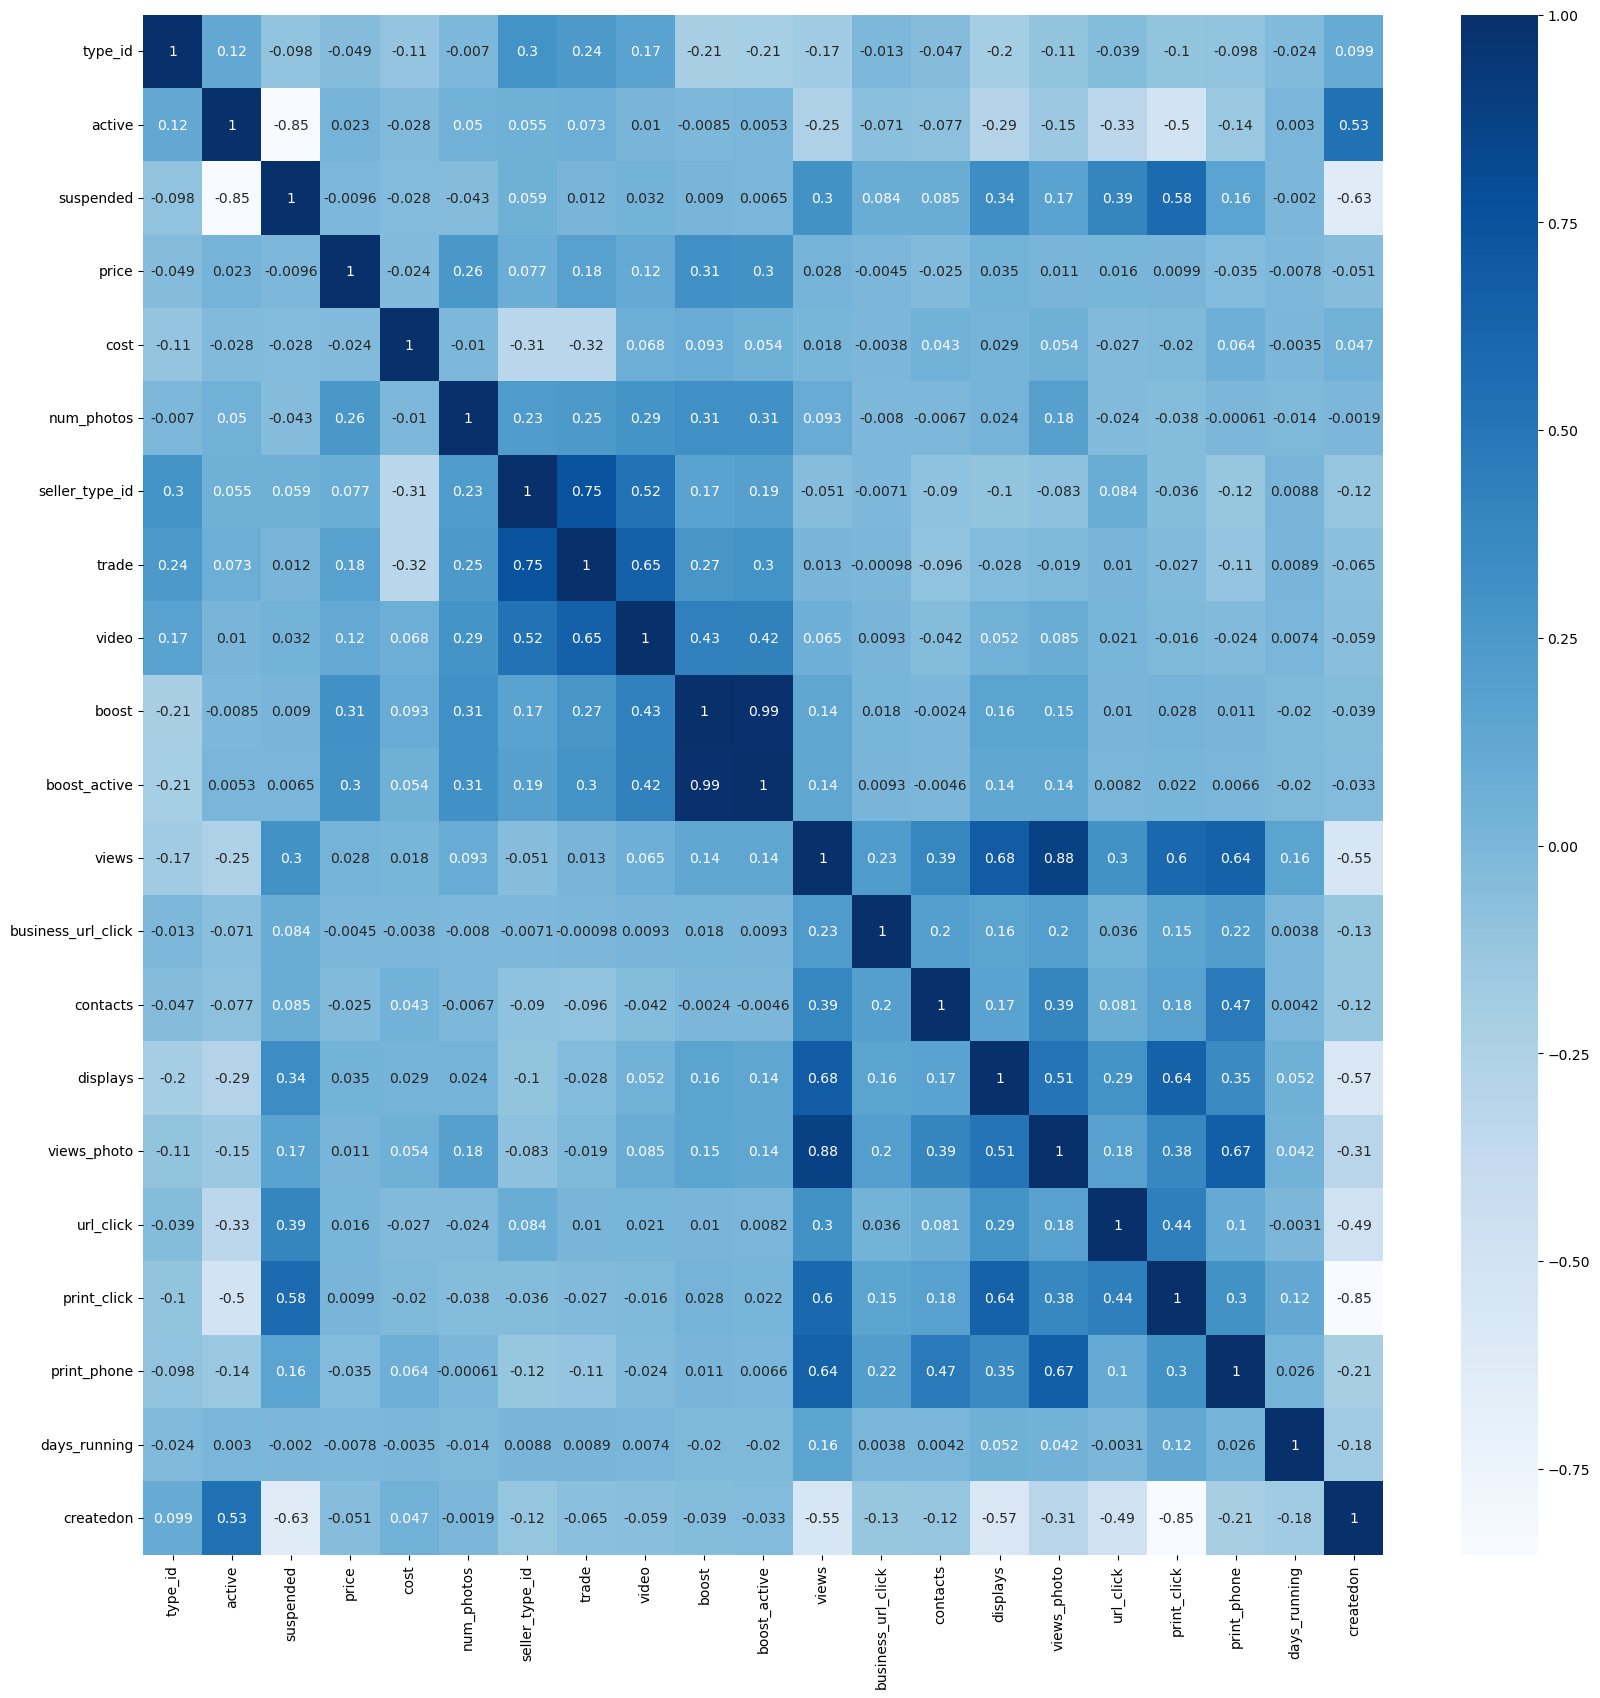

In [76]:
# Checking for multi-collinearity
correlation = df_corr.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap='Blues', annot=True, annot_kws={'fontsize': 10})
plt.show()

Observations : <br>
1. Boost is likely to have no effect on any metrics.
2. Number of photos is likely to not have any impact on views, i.e., 1 photo or 100 photos might not make a major difference to Ad performance.
3. Views is dependent on Displays and number of views photos receive.
4. Contacts is primarily correlated with views_photo and print_phone.

In [77]:
pd.crosstab(performance_metrics['ad_approved'],performance_metrics['suspended'])

suspended        0    1
ad_approved            
0               86    0
1            19598  814

### <div class = "alert alert-danger"> Boost Button </div>

In [78]:
pd.crosstab(performance_metrics['boost_active'],performance_metrics['boost'])

boost             0      1
boost_active              
0             10095    131
1                 1  10271

In [79]:
performance_metrics['days_running'].value_counts()

days_running
0      20486
235        2
284        2
64         1
136        1
11         1
33         1
137        1
63         1
124        1
27         1
Name: count, dtype: int64

In [80]:
df_boosted = performance_metrics[performance_metrics['boost_active']==1]

In [81]:
df_boosted.describe().T

count                           mean  \
type_id             10272.0                       4.443536   
active              10272.0                        0.94704   
suspended           10272.0                       0.040985   
price               10272.0                 3993482.255938   
cost                10272.0                      77.675818   
num_photos          10272.0                      16.528232   
seller_type_id      10272.0                         0.8566   
trade               10272.0                       0.920853   
video               10272.0                            1.0   
boost               10272.0                       0.999903   
boost_active        10272.0                            1.0   
views               10272.0                     360.935456   
business_url_click  10272.0                       0.000974   
contacts            10272.0                        0.45405   
displays            10272.0                   12314.235981   
views_photo         10272.0                    1634.976928   
url_click           10272.0                       3.485981   
print_click         10272.0                       2.532321   
print_phone         10272.0                       0.878213   
days_running        10272.0                            0.0   
createdon             10272  2023-01-22 17:30:50.018399744   
ad_approved         10272.0                       0.999611   
expired             10272.0                       0.011974   

                                    min                            25%  \
type_id                             1.0                            1.0   
active                              0.0                            1.0   
suspended                           0.0                            0.0   
price                               0.0                      1528800.0   
cost                                0.0                            0.0   
num_photos                          0.0                            9.0   
seller_type_id                      0.0                            1.0   
trade                               0.0                            1.0   
video                               1.0                            1.0   
boost                               0.0                            1.0   
boost_active                        1.0                            1.0   
views                               0.0                           87.0   
business_url_click                  0.0                            0.0   
contacts                            0.0                            0.0   
displays                            0.0                        3352.75   
views_photo                         0.0                          112.0   
url_click                           0.0                            0.0   
print_click                         0.0                            0.0   
print_phone                         0.0                            0.0   
days_running                        0.0                            0.0   
createdon           2016-08-10 11:49:14  2022-12-14 13:10:16.750000128   
ad_approved                         0.0                            1.0   
expired                             0.0                            0.0   

                                    50%                  75%  \
type_id                             7.0                  7.0   
active                              1.0                  1.0   
suspended                           0.0                  0.0   
price                         3100000.0            5799500.0   
cost                                0.0                  0.0   
num_photos                         14.0                 21.0   
seller_type_id                      1.0                  1.0   
trade                               1.0                  1.0   
video                               1.0                  1.0   
boost                               1.0                  1.0   
boost_active                        1.0             

In [82]:
df_notboosted = performance_metrics[performance_metrics['boost_active']==0]

In [83]:
df_notboosted.describe().T

count                           mean  \
type_id             10226.0                       5.850479   
active              10226.0                       0.944651   
suspended           10226.0                       0.038431   
price               10226.0                 1763665.965382   
cost                10226.0                      41.150303   
num_photos          10226.0                        8.53452   
seller_type_id      10226.0                       0.699394   
trade               10226.0                       0.685703   
video               10226.0                       0.695384   
boost               10226.0                        0.01281   
boost_active        10226.0                            0.0   
views               10226.0                      196.08273   
business_url_click  10226.0                       0.000391   
contacts            10226.0                       0.493155   
displays            10226.0                    6207.275083   
views_photo         10226.0                     597.255232   
url_click           10226.0                       3.141404   
print_click         10226.0                       2.216214   
print_phone         10226.0                       0.806376   
days_running        10226.0                       0.159691   
createdon             10226  2023-02-11 06:16:22.251418112   
ad_approved         10226.0                       0.991981   
expired             10226.0                       0.016918   

                                    min                         25%  \
type_id                             1.0                         2.0   
active                              0.0                         1.0   
suspended                           0.0                         0.0   
price                               0.0                      9300.0   
cost                                0.0                         0.0   
num_photos                          0.0                         1.0   
seller_type_id                      0.0                         0.0   
trade                               0.0                         0.0   
video                               0.0                         0.0   
boost                               0.0                         0.0   
boost_active                        0.0                         0.0   
views                               0.0                        10.0   
business_url_click                  0.0                         0.0   
contacts                            0.0                         0.0   
displays                            0.0                       746.0   
views_photo                         0.0                         0.0   
url_click                           0.0                         0.0   
print_click                         0.0                         0.0   
print_phone                         0.0                         0.0   
days_running                        0.0                         0.0   
createdon           2015-06-26 15:14:51  2023-02-20 11:41:56.500000   
ad_approved                         0.0                         1.0   
expired                             0.0                         0.0   

                                           50%                  75%  \
type_id                                    7.0                 10.0   
active                                     1.0                  1.0   
suspended                                  0.0                  0.0   
price                                  65000.0            2499500.0   
cost                                       0.0                  0.0   
num_photos                                 5.0                 10.0   
seller_type_id                             1.0                  1.0   
trade                                      1.0                  1.0   
video                                      1.0                  1.0   
boost                                      0.0                  0.0   
boost_active                               0.0 

#### <div class ='alert alert-warning'>CONTACTS - num_photos</div>

<Axes: >

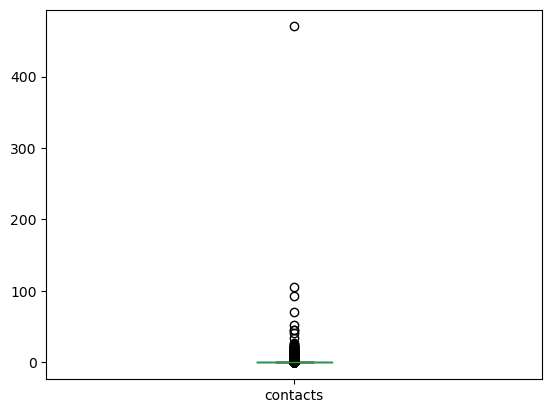

In [84]:
# Outlier in contacts
# sns.boxplot(df_notboosted['print_phone'])

df_notboosted.boxplot(column = 'contacts', grid = False)

In [85]:
# Drop rows where 'contacts' is greater than 200
df_notboosted = df_notboosted[df_notboosted['contacts'] < 200]

In [86]:
# Drop rows where 'contacts' is greater than 200
df_boosted = df_boosted[df_boosted['contacts'] < 200]

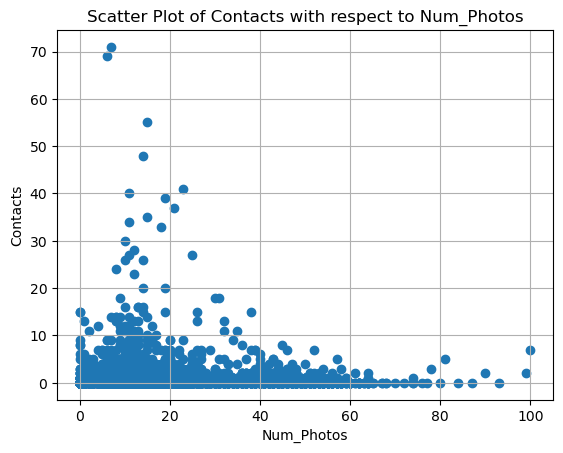

In [87]:
# Plotting scatterplot
plt.scatter(df_boosted['num_photos'], df_boosted['contacts'])
plt.xlabel('Num_Photos')
plt.ylabel('Contacts')
plt.title('Scatter Plot of Contacts with respect to Num_Photos')
plt.grid(True)
plt.show()

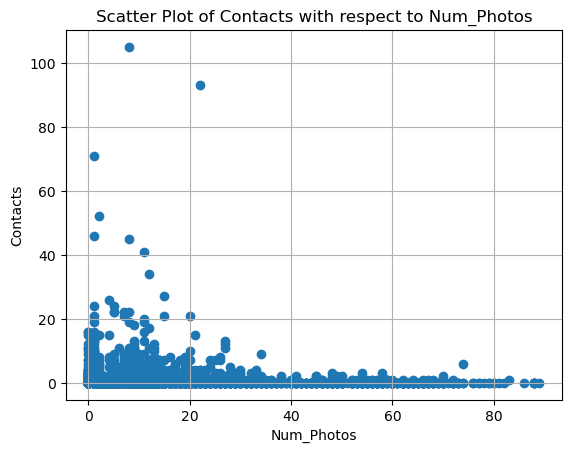

In [88]:
# Plotting scatterplot
plt.scatter(df_notboosted['num_photos'], df_notboosted['contacts'])
plt.xlabel('Num_Photos')
plt.ylabel('Contacts')
plt.title('Scatter Plot of Contacts with respect to Num_Photos')
plt.grid(True)
plt.show()

<div class="alert alert-success">
The sweet spot for boosted ads for contacts lies between 5 to 25 photos. <br>
For non-boosted ads, anything below 20 photos is working better. <br>
<br>
Although we can notice a significant difference between boosted and non-boosted ads in terms of contacts, we can generalize and claim that ads with less than 30 photos are being "CONTACTED" </div>

#### <div class='alert alert-warning'> Print_phone - num_photos </div>

<Axes: >

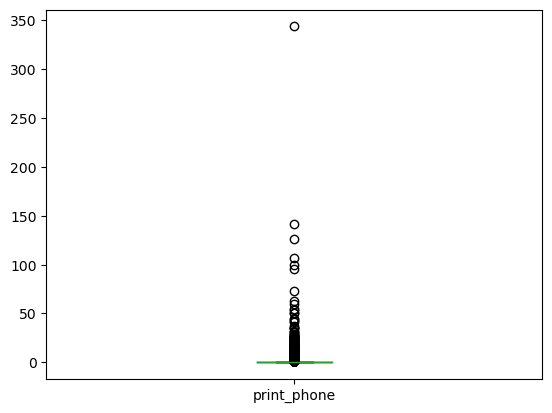

In [89]:
# Outlier in contacts
# sns.boxplot(df_notboosted['print_phone'])

df_notboosted.boxplot(column = 'print_phone', grid = False)

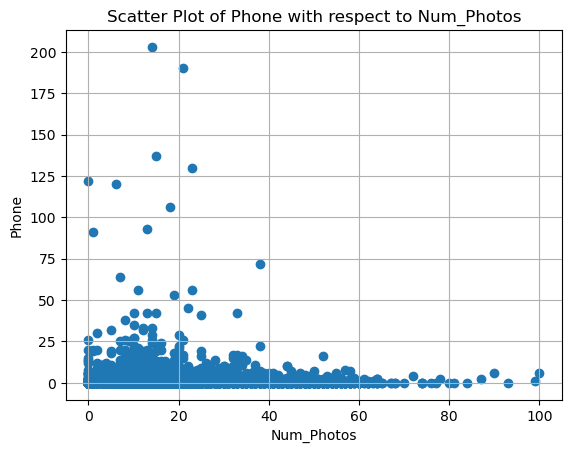

In [90]:
# Plotting scatterplot
plt.scatter(df_boosted['num_photos'], df_boosted['print_phone'])
plt.xlabel('Num_Photos')
plt.ylabel('Phone')
plt.title('Scatter Plot of Phone with respect to Num_Photos')
plt.grid(True)
plt.show()

In [91]:
df_notboosted = df_notboosted[df_notboosted['print_phone'] < 200]

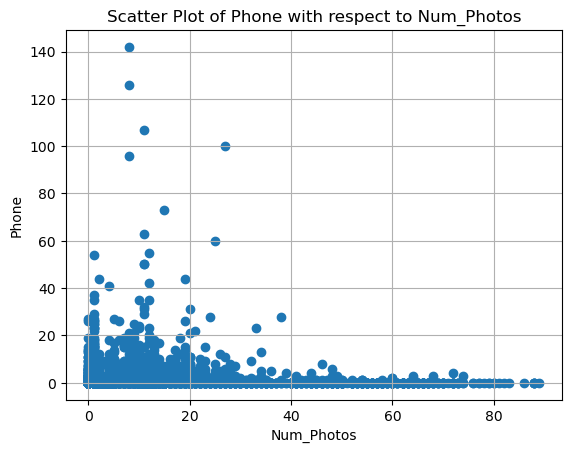

In [92]:
# Plotting scatterplot
plt.scatter(df_notboosted['num_photos'], df_notboosted['print_phone'])
plt.xlabel('Num_Photos')
plt.ylabel('Phone')
plt.title('Scatter Plot of Phone with respect to Num_Photos')
plt.grid(True)
plt.show()

<div class='alert alert-success'> The sweet-spot for both boosted and non-boosted ads are less than 40 photos. <br>
    But in general, we can observe that boosted Ads are receiving slightly better metrics as compared to the non-boosted Ads. </div>

#### <div class='alert alert-warning'> User Behaviour - Cost vs num_photos </div>

This is a user-behaviour analysis to observe if the cost of the Ads affect the number of photos uploaded by users. <br>
This is not a Conversion-metric Analysis!!

But first, let us create a Cost dataframe.

In [93]:
performance_metrics['cost'].value_counts()

cost
0       19742
1799      161
899       131
699        59
2799       52
1499       43
2599       42
1299       38
799        32
1599       16
1698       14
999        14
2499       14
1259       11
1999       11
499        11
1398        9
2298        9
1399        8
2399        6
2798        6
1099        5
1898        5
3798        3
599         3
3098        3
489         3
1598        3
1298        3
1959        3
3298        3
1998        3
2898        2
5099        2
3297        2
1049        2
2498        2
4097        2
2398        2
2998        2
3398        2
909         1
3598        1
4099        1
629         1
3999        1
6599        1
1958        1
4297        1
1819        1
1798        1
1249        1
2098        1
2099        1
649         1
Name: count, dtype: int64

In [94]:
# creating new df for paid ads
df_paidAds = performance_metrics[performance_metrics['cost'] != 0]

In [95]:
df_paidAds.shape

(756, 26)

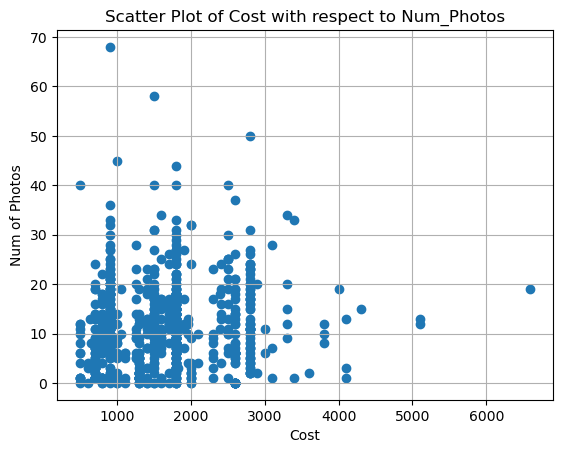

In [96]:
# Plotting scatterplot
plt.scatter(df_paidAds['cost'], df_paidAds['num_photos'])
plt.xlabel('Cost')
plt.ylabel('Num of Photos')
plt.title('Scatter Plot of Cost with respect to Num_Photos')
plt.grid(True)
plt.show()

Except for a few outliers, the cost of the Ads doesn't seem to affect user behaviour distinctively, i.e., users display generalized bahaviour.

In [97]:
df_paidAds.boost_active.value_counts()

boost_active
1    398
0    358
Name: count, dtype: int64

#### <div class='alert alert-warning'> Business Url Click </div>

In [98]:
performance_metrics.business_url_click.value_counts()

business_url_click
0    20487
1        8
2        3
Name: count, dtype: int64

In [99]:
df.business_url_click.value_counts()

business_url_click
0    20487
1        8
2        3
Name: count, dtype: int64

There is no point in analysing "business_url_click" as there is no sufficient clicks on business URLs.

#### <div class='alert alert-warning'> Print Click</div>

Is print_click really a prominent metric?

In [100]:
performance_metrics['print_click'].value_counts()

print_click
0     12432
1      2922
2      1513
3       823
4       504
      ...  
78        1
77        1
70        1
79        1
83        1
Name: count, Length: 79, dtype: int64

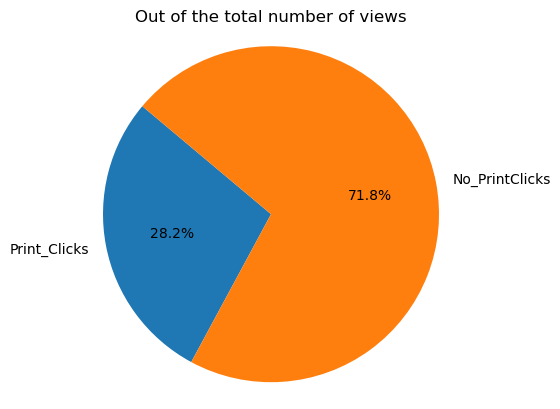

In [101]:
# Calculate the count of 'print_click' not equal to zero
print_click_not_zero_count = (performance_metrics['print_click'] != 0).sum()

# Calculate the count of 'views'
views_count = performance_metrics['views'].count()

# Plot the pie chart
labels = ['Print_Clicks', 'No_PrintClicks']
sizes = [print_click_not_zero_count, views_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Out of the total number of views')
plt.show()

Insight : The probability of a user clicking "PRINT" button on Ads page is 0.3

In [102]:
# Recreating boosted and notboosted DFs

In [103]:
df_notboosted = performance_metrics[performance_metrics['boost_active']==0]

In [104]:
df_boosted = performance_metrics[performance_metrics['boost_active']==1]

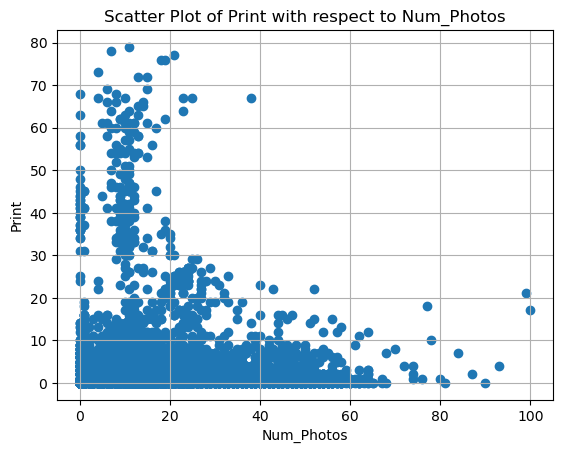

In [105]:
# Plotting scatterplot
plt.scatter(df_boosted['num_photos'], df_boosted['print_click'])
plt.xlabel('Num_Photos')
plt.ylabel('Print')
plt.title('Scatter Plot of Print with respect to Num_Photos')
plt.grid(True)
plt.show()

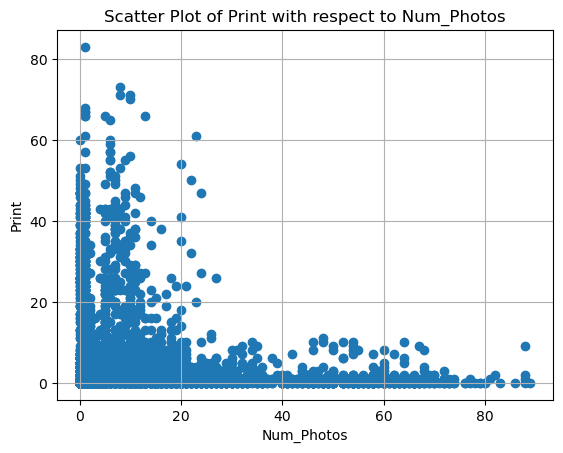

In [106]:
# Plotting scatterplot
plt.scatter(df_notboosted['num_photos'], df_notboosted['print_click'])
plt.xlabel('Num_Photos')
plt.ylabel('Print')
plt.title('Scatter Plot of Print with respect to Num_Photos')
plt.grid(True)
plt.show()

<div class='alert alert-success'>The sweet-spot for Print with respect to both boosted and non-boosted ads are less than 20 photos.
But in general, we can observe that boosted Ads are receiving slightly better metrics as compared to the non-boosted Ads.</div>

#### <div class='alert alert-warning'>Boost vs Time of the day </div>

In [107]:
performance_metrics.columns

Index(['title', 'type_id', 'type_name', 'active', 'suspended', 'username',
       'price', 'cost', 'num_photos', 'seller_type_id', 'trade', 'video',
       'boost', 'boost_active', 'views', 'business_url_click', 'contacts',
       'displays', 'views_photo', 'url_click', 'print_click', 'print_phone',
       'days_running', 'createdon', 'ad_approved', 'expired'],
      dtype='object')

In [108]:
performance_metrics.createdon.head()

0   2023-03-01 11:41:38
1   2023-03-05 11:40:21
2   2023-03-08 11:40:12
3   2023-03-11 11:40:42
4   2023-03-21 15:42:16
Name: createdon, dtype: datetime64[ns]

In [109]:
# Extract the hour from 'createdon'
df_boosted['hour_of_day'] = df_boosted['createdon'].dt.hour

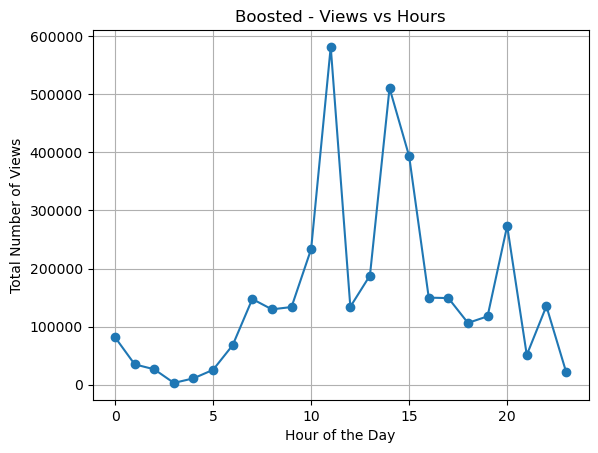

In [110]:
# Group by 'hour_of_day' and calculate the sum of 'views' for each hour
hourly_views = df_boosted.groupby('hour_of_day')['views'].sum()

# Plot the graph
plt.plot(hourly_views.index, hourly_views.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Views')
plt.title('Boosted - Views vs Hours')
plt.grid(True)
plt.show()

In [111]:
# Extract the hour from 'createdon'
df_notboosted['hour_of_day'] = df_notboosted['createdon'].dt.hour

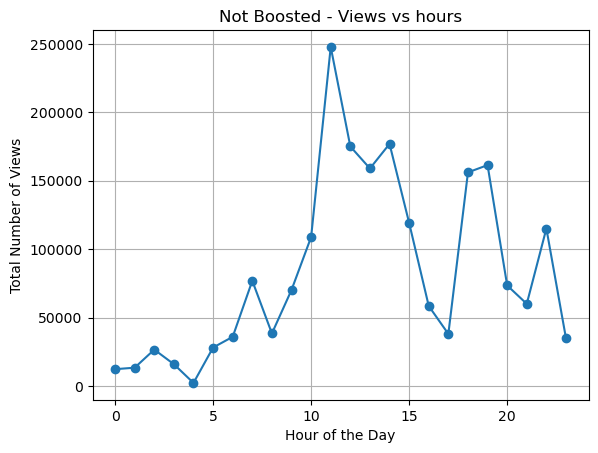

In [112]:
# Group by 'hour_of_day' and calculate the sum of 'views' for each hour
hourly_views = df_notboosted.groupby('hour_of_day')['views'].sum()

# Plot the graph
plt.plot(hourly_views.index, hourly_views.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Views')
plt.title('Not Boosted - Views vs hours')
plt.grid(True)
plt.show()

<p style='font-weight:bold'> Ads receive more views at particular times of the day</p> 

In [113]:
# Comparing with previous 1 month of data
df_july = performance_metrics[performance_metrics['createdon'].dt.month == 7]

In [114]:
df_july.shape

(2507, 26)

In [115]:
# Extract the hour from 'createdon'
df_july['hour_of_day'] = df_july['createdon'].dt.hour

In [116]:
# Boosted and notBoosted
df_Julynotboosted = df_july[df_july['boost_active']==0]
df_Julyboosted = df_july[df_july['boost_active']==1]

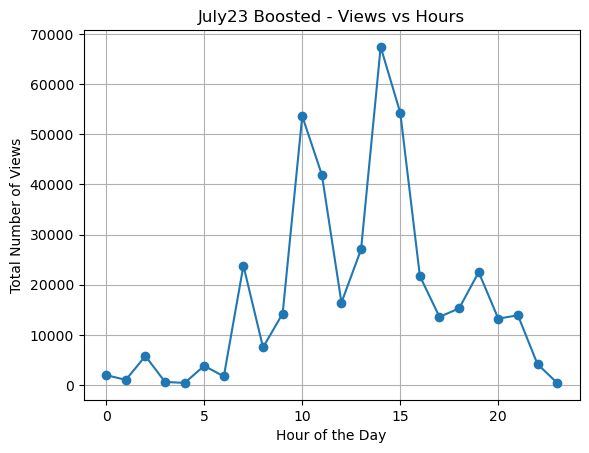

In [117]:
# Group by 'hour_of_day' and calculate the sum of 'views' for each hour
hourly_views = df_Julyboosted.groupby('hour_of_day')['views'].sum()

# Plot the graph
plt.plot(hourly_views.index, hourly_views.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Views')
plt.title('July23 Boosted - Views vs Hours')
plt.grid(True)
plt.show()

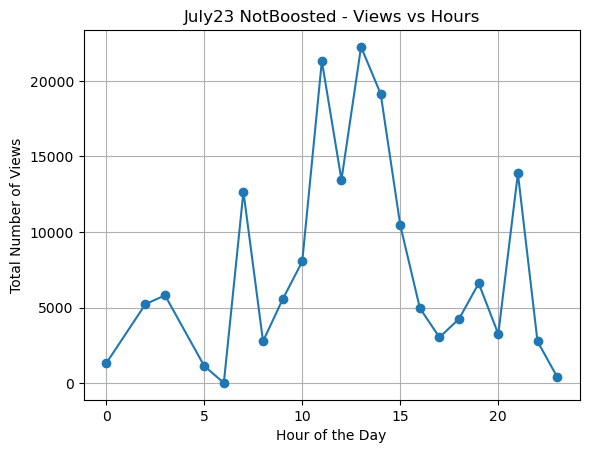

In [118]:
# Group by 'hour_of_day' and calculate the sum of 'views' for each hour
hourly_views = df_Julynotboosted.groupby('hour_of_day')['views'].sum()

# Plot the graph
plt.plot(hourly_views.index, hourly_views.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Views')
plt.title('July23 NotBoosted - Views vs Hours')
plt.grid(True)
plt.show()

### <div class='alert alert-danger'> Cost - Category - Views </div>

In [119]:
pd.crosstab(performance_metrics.type_id,performance_metrics.views)

views    0      1      2      3      4      5      6      7      8      9      \
type_id                                                                         
1           36      1     14     15      5      7     10     12     10     13   
2           26     10      6     13      6     10      9      9     11      8   
3            0      0      1      2      1      0      3      0      0      2   
4            0      0      0      0      0      0      0      0      0      1   
5           13     23     20     41     43     68     53     64     56     56   
6            0      4      2      3      0      1      1      2      1      0   
7           25      7     20     19     16     17     18     16     18     20   
9            5      1      0      0      0      0      1      0      2      1   
10          57     29     76    258    329    283    228    195    148    148   
11           0      0      0      0      0      1      0      0      0      0   

views    ...  10826  10843  11222  11895  12573  13069  14152  14365  16515  \
type_id  ...                                                                  
1        ...      0      1      1      1      1      0      0      0      0   
2        ...      0      0      0      0      0      1      1      1      1   
3        ...      0      0      0      0      0      0      0      0      0   
4        ...      0      0      0      0      0      0      0      0      0   
5        ...      0      0      0      0      0      0      0      0      0   
6        ...      0      0      0      0      0      0      0      0      0   
7        ...      0      0      0      0      0      0      0      0      0   
9        ...      1      0      0      0      0      0      0      0      0   
10       ...      0      0      0      0      0      0      0      0      0   
11       ...      0      0      0      0      0      0      0      0      0   

views    24921  
type_id         
1            1  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
9            0  
10           0  
11           0  

[10 rows x 1739 columns]

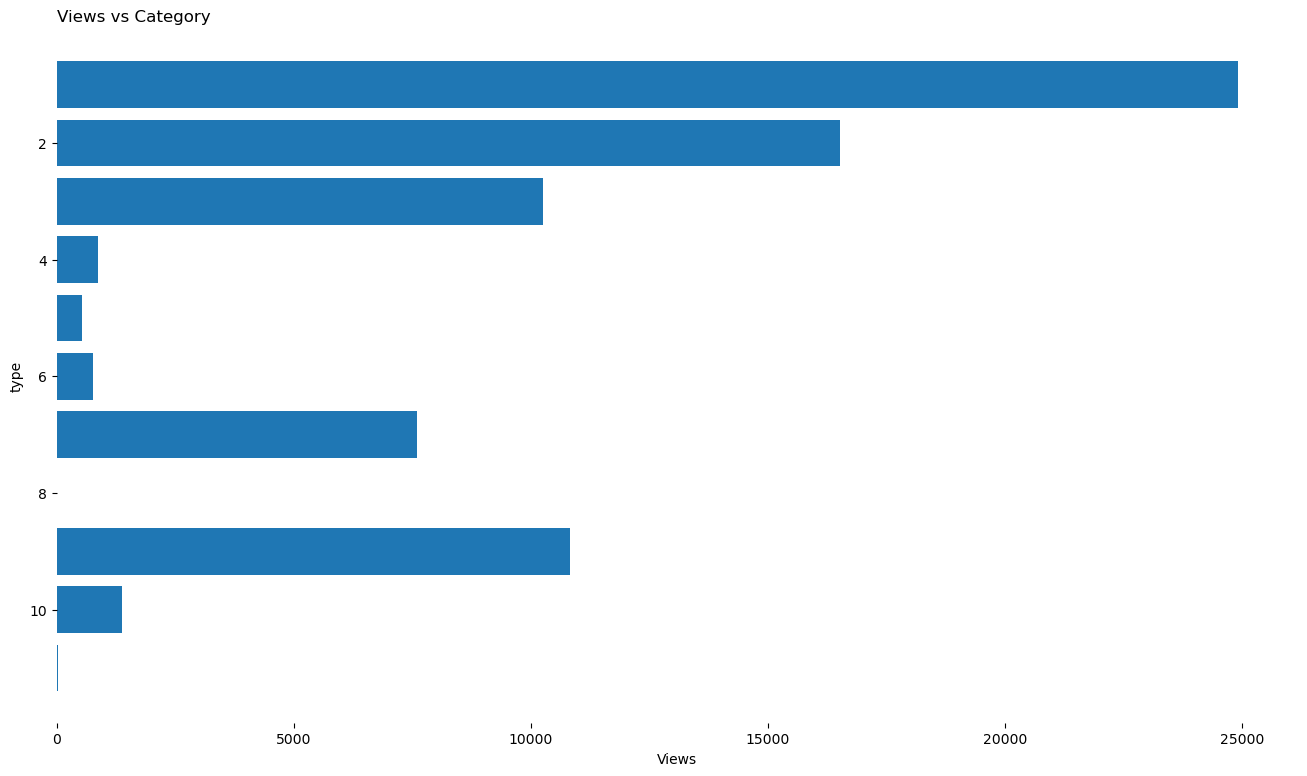

In [120]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(performance_metrics.type_id, performance_metrics.views)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)


# Show top values
ax.invert_yaxis()

ax.set_xlabel('Views')
ax.set_ylabel('type')
ax.set_title('Views vs Category',
             loc ='left', )

# Show Plot
plt.show()

"1"	"Touring Caravans" <br>
"2"	"Static Caravans" <br>
"9"	"Campervans" <br>
"3"	"Lodge" <br>
"7"	"Motorhomes" <br>
"10" "For Hire" <br>
"4"	"Wanted" <br>
"6"	"Towing Vehicles" <br>
"5"	"Accessories" <br>
"11" "Services" <br>

<p style='font-weight : bold'>We can clearly observe that the users are inclined to view some categories more than others due. This user-behaviour is primarily based on user requirements, and cannot be factored directly to Ad performance.</p>

In [121]:
df_costBreakdown = df.groupby(['type_id','cat_id']).agg(total_cost=('cost','sum')).reset_index()

In [122]:
df_costBreakdown

type_id  cat_id  total_cost
0         1       0           0
1         1      61        7155
2         1      62        4697
3         1      63        2698
4         1      64       23286
..      ...     ...         ...
61       11      71        4099
62       11      97           0
63       11     109        3098
64       11     118           0
65       11     127           0

[66 rows x 3 columns]

In [123]:
df_costBreakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_id     66 non-null     int64
 1   cat_id      66 non-null     int64
 2   total_cost  66 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [124]:
df_viewBreakdown = df.groupby(['type_id','cat_id']).agg(total_views=('views','sum')).reset_index()

In [125]:
df_viewBreakdown

type_id  cat_id  total_views
0         1       0        69631
1         1      61        20700
2         1      62         8207
3         1      63        11200
4         1      64        26903
..      ...     ...          ...
61       11      71           22
62       11      97           35
63       11     109           29
64       11     118           20
65       11     127           11

[66 rows x 3 columns]

In [126]:
df_viewBreakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   type_id      66 non-null     int64
 1   cat_id       66 non-null     int64
 2   total_views  66 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [127]:
# Importing Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearColorMapper
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
from bokeh.io import output_notebook

In [128]:
# Create a ColumnDataSource
source = ColumnDataSource(df_costBreakdown)

# Color Mapper
color_mapper = LinearColorMapper(palette='Inferno256')

# Create a Bokeh figure
p = figure(title='Total Cost Distribution')

# Create scatter plot
p.vbar(x='type_id', top='total_cost', source=source, legend_field='type_id', fill_alpha=0.6, fill_color ={'field':'type_id','transform':color_mapper})

# Add legend
p.legend.title = 'type_id'

# Customize plot
p.title.text_font_size = '16pt'
p.xaxis.axis_label = 'cat_id'
p.yaxis.axis_label = 'Cost'

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [129]:
# Create a ColumnDataSource
source = ColumnDataSource(df_costBreakdown)

# Color Mapper
color_mapper = LinearColorMapper(palette='Inferno256')

# Create a Bokeh figure
p = figure(title='Total Cost Distribution')

# Create scatter plot
p.vbar(x='cat_id', top='total_cost', source=source, legend_field='type_id', fill_alpha=0.6, fill_color ={'field':'type_id','transform':color_mapper})

# Add legend
p.legend.title = 'type_id'

# Customize plot
p.title.text_font_size = '16pt'
p.xaxis.axis_label = 'cat_id'
p.yaxis.axis_label = 'Cost'

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [130]:
def plot_bar_plots(df):
    unique_type_ids = df['type_id'].unique()

    for type_id in unique_type_ids:
        type_data = df[df['type_id'] == type_id]
        plt.figure(figsize=(8, 6))
        
        ax =sns.barplot(x='cat_id', y='total_cost', data=type_data)
        
        # Display cost values on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
            
        plt.title(f'Bar Plot for type_id {type_id}')
        plt.xlabel('cat_id')
        plt.ylabel('Sum of Cost')
        plt.show()

In [131]:
df_costBreakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_id     66 non-null     int64
 1   cat_id      66 non-null     int64
 2   total_cost  66 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [132]:
df_viewBreakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   type_id      66 non-null     int64
 1   cat_id       66 non-null     int64
 2   total_views  66 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [133]:
def plot_subplots(df_ads, df_views):
    # Get unique type_id values
    type_ids = df_ads['type_id'].unique()
    
    # Set up subplots
    num_plots = len(type_ids)
    fig, axes = plt.subplots(num_plots, 2, figsize=(12, 6 * num_plots))
    
    # Loop through type_ids and create bar plots for each
    for i, type_id in enumerate(type_ids):
        ax_ads = axes[i, 0]
        ax_views = axes[i, 1]
        
        # Filter data for the current type_id
        df_ads_filtered = df_ads[df_ads['type_id'] == type_id]
        df_views_filtered = df_views[df_views['type_id'] == type_id]
        
        # Group and sum by cat_id and cost for both DataFrames
        ads_grouped = df_ads_filtered.groupby('cat_id')['total_cost'].sum()
        views_grouped = df_views_filtered.groupby('cat_id')['total_views'].sum()
        
        # Plotting for ads
        x_ads = range(len(ads_grouped))
        ax_ads.bar(x_ads, ads_grouped, width=0.4, label='Total Ads Cost', align='center')
        ax_ads.set_title(f'Type ID: {type_id} - Ads Cost')
        ax_ads.set_xticks(x_ads)
        ax_ads.set_xticklabels(ads_grouped.index)
        ax_ads.legend()
        
        # Plotting for views
        x_views = range(len(views_grouped))
        ax_views.bar(x_views, views_grouped, width=0.4, label='Total Views', align='center')
        ax_views.set_title(f'Type ID: {type_id} - Views')
        ax_views.set_xticks(x_views)
        ax_views.set_xticklabels(views_grouped.index)
        ax_views.legend()
    
    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

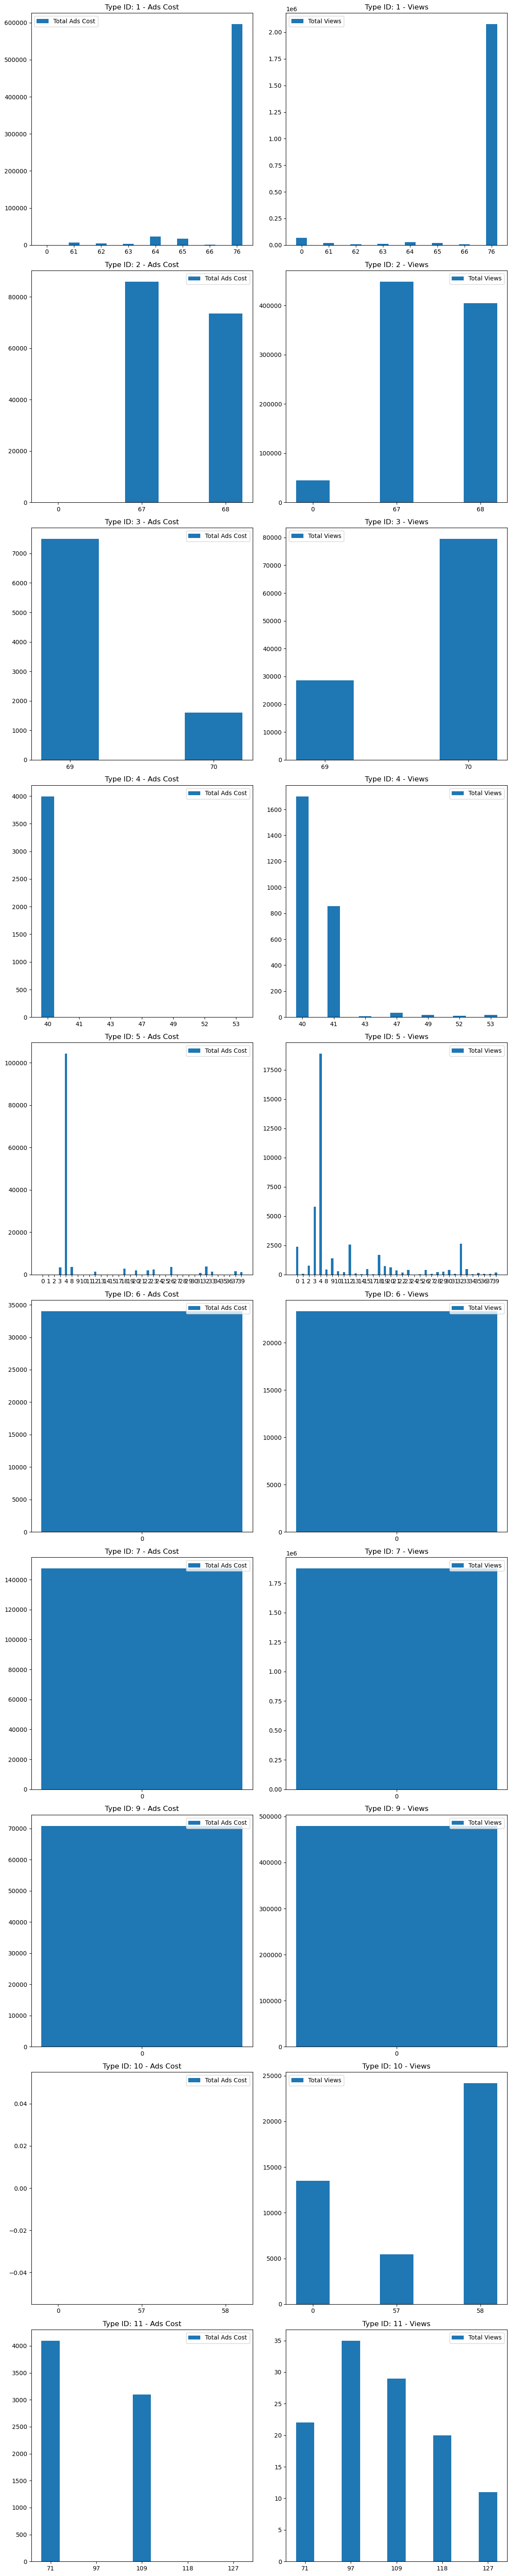

In [134]:
plot_subplots(df_costBreakdown, df_viewBreakdown)

***

# <div class = 'alert alert-info'> Machine Learning for Feature Importance</div>

### <div class = 'alert alert-danger'>Business Profiles - Feature Importance for Views</div>

Business profiles are indented by the feature <br>
<br>
'trade' = 1

In [135]:
df.trade.value_counts()

trade
1    16471
0     4027
Name: count, dtype: int64

In [136]:
# creating a new DF with trade=1
df_trade = performance_metrics[performance_metrics['trade']==1]

In [137]:
df_trade.shape

(16471, 26)

In [138]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16471 entries, 0 to 20490
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               13515 non-null  object        
 1   type_id             16471 non-null  int64         
 2   type_name           16471 non-null  object        
 3   active              16471 non-null  int64         
 4   suspended           16471 non-null  int64         
 5   username            16471 non-null  object        
 6   price               16471 non-null  int64         
 7   cost                16471 non-null  int64         
 8   num_photos          16471 non-null  int64         
 9   seller_type_id      16471 non-null  int64         
 10  trade               16471 non-null  int64         
 11  video               16471 non-null  int64         
 12  boost               16471 non-null  int64         
 13  boost_active        16471 non-null  int64         


In [139]:
df_trade['createdon'] = pd.to_datetime(df_trade['createdon'])

In [140]:
df_tradeFeatures = df_trade.drop(['title','type_name','username','createdon'],axis =1)

In [141]:
#df_determiners['type_id','cat_id','active','ad_sold','suspended','approved','region_id','county_id','user_active','top_ad','top_ad_active','highlighted','highlighted_active','boost','boost_active','video_active','umphotos_active','package_id','paying_trader','premium_ad','photo','num_photos','seller_type_id','map_on_ad','reply_me','price','trade','video','emailable','enable_maps','photos_removed','views','contacts','displays','views_photo','url_click','print_click','print_phone']

In [142]:
df_determiners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   type_id             20498 non-null  int64
 1   cat_id              20498 non-null  int64
 2   active              20498 non-null  int64
 3   ad_sold             20498 non-null  int64
 4   suspended           20498 non-null  int64
 5   approved            20498 non-null  int64
 6   region_id           20498 non-null  int64
 7   county_id           20498 non-null  int64
 8   user_active         20498 non-null  int64
 9   top_ad              20498 non-null  int64
 10  top_ad_active       20498 non-null  int64
 11  highlighted         20498 non-null  int64
 12  highlighted_active  20498 non-null  int64
 13  boost               20498 non-null  int64
 14  boost_active        20498 non-null  int64
 15  video_active        20498 non-null  int64
 16  umphotos_active     20498 non-null  int6

In [143]:
df_determiners.describe().T

count          mean           std  min      25%  \
type_id             20498.0  5.145429e+00  3.384584e+00  1.0      1.0   
cat_id              20498.0  3.585608e+01  3.476529e+01  0.0      0.0   
active              20498.0  9.458484e-01  2.263222e-01  0.0      1.0   
ad_sold             20498.0  5.093668e-01  4.999245e-01  0.0      0.0   
suspended           20498.0  3.971119e-02  1.952846e-01  0.0      0.0   
approved            20498.0  9.970729e-01  6.470833e-02  0.0      1.0   
region_id           20498.0  6.253342e+00  5.534827e+00  0.0      1.0   
county_id           20498.0  6.655425e+01  1.760673e+02  0.0      8.0   
user_active         20498.0  5.696653e-01  4.951350e-01  0.0      0.0   
top_ad              20498.0  5.148307e-01  4.997922e-01  0.0      0.0   
top_ad_active       20498.0  5.059030e-01  4.999773e-01  0.0      0.0   
highlighted         20498.0  6.534784e-01  4.758733e-01  0.0      0.0   
highlighted_active  20498.0  6.468436e-01  4.779625e-01  0.0      0.0   
boost               20498.0  5.074641e-01  4.999565e-01  0.0      0.0   
boost_active        20498.0  5.011221e-01  5.000109e-01  0.0      0.0   
video_active        20498.0  7.103132e-02  2.568834e-01  0.0      0.0   
umphotos_active     20498.0  8.370573e-01  3.693224e-01  0.0      1.0   
package_id          20498.0  5.744975e+01  6.126668e+00  0.0     52.0   
paying_trader       20498.0  7.819299e-01  4.129453e-01  0.0      1.0   
premium_ad          20498.0  8.507171e-01  3.563758e-01  0.0      1.0   
photo               20498.0  9.479461e-01  2.221411e-01  0.0      1.0   
num_photos          20498.0  1.254035e+01  1.281277e+01  0.0      5.0   
seller_type_id      20498.0  7.781735e-01  4.154852e-01  0.0      1.0   
map_on_ad           20498.0  1.935799e-01  3.951130e-01  0.0      0.0   
reply_me            20498.0  8.035906e-01  3.972914e-01  0.0      1.0   
price               20498.0  2.881076e+06  3.656863e+06  0.0  13300.0   
trade               20498.0  8.035418e-01  3.973287e-01  0.0      1.0   
video               20498.0  8.480340e-01  3.589967e-01  0.0      1.0   
emailable           20498.0  8.035906e-01  3.972914e-01  0.0      1.0   
enable_maps         20498.0  1.946044e-01  3.959055e-01  0.0      0.0   
photos_removed      20498.0  6.792858e-01  9.471991e-01  0.0      0.0   
views               20498.0  2.786941e+02  5.845477e+02  0.0     22.0   
contacts            20498.0  4.735584e-01  4.259501e+00  0.0      0.0   
displays            20498.0  9.267608e+03  2.114572e+04  0.0   1569.0   
views_photo         20498.0  1.117280e+03  3.653704e+03  0.0      0.0   
url_click           20498.0  3.314079e+00  2.094223e+01  0.0      0.0   
print_click         20498.0  2.374622e+00  7.173497e+00  0.0      0.0   
print_phone         20498.0  8.423749e-01  5.416424e+00  0.0      0.0   

                          50%        75%          max  
type_id                   7.0        7.0         11.0  
cat_id                   58.0       76.0        127.0  
active                    1.0        1.0          1.0  
ad_sold                   1.0        1.0          1.0  
suspended                 0.0        0.0          1.0  
approved                  1.0        1.0          2.0  
region_id                 4.0       10.0         59.0  
county_id                44.0       93.0       3435.0  
user_active               1.0        1.0          1.0  
top_ad                    1.0        1.0          1.0  
top_ad_active             1.0        1.0          1.0  
highlighted               1.0        1.0          1.0  
highlighted_active        1.0        1.0          1.0  
boost                     1.0        1.0          1.0  
boost_active              1.0        1.0          1.0  
video_active              0.0        0.0          1.0  
umphotos_active           1.0        1.0          1.0  
package_id               61.0       61.0         70.0  
paying_trader             1.0        1.0          1.0  
premium_ad                1.0        1.0          1.0 

In [144]:
# introducing dummy variables for categorical features
data_dummy=pd.get_dummies(df_determiners,drop_first=True)
data_dummy.shape

(20498, 38)

In [145]:
y = data_dummy['views']

In [146]:
X = data_dummy.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [147]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [148]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [150]:
# making predictions

yhat=reg.predict(x_train)

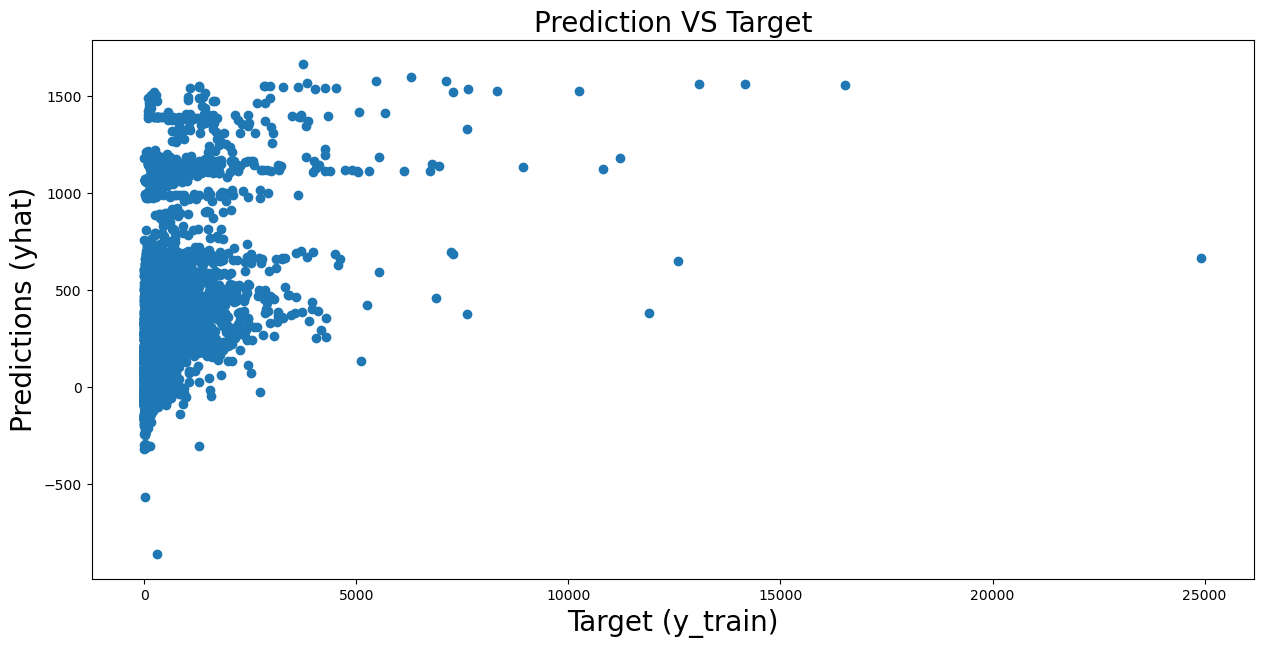

In [151]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [152]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.17285680242297163

In [153]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.17129005189597135

In [154]:
reg.intercept_

278.6149998342523

In [155]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features      Weight
4            suspended  213.323973
27               video  179.930927
10       top_ad_active  143.729002
11         highlighted  132.671108
14        boost_active  123.517627
29         enable_maps   84.777687
26               trade   67.304110
2               active   50.938349
1               cat_id   46.950512
28           emailable   44.946223
24            reply_me   44.946223
21          num_photos   38.369778
20               photo   34.295537
0              type_id   21.730658
7            county_id   19.001841
9               top_ad    8.413171
8          user_active    7.018171
5             approved    2.209591
6            region_id   -2.239123
15        video_active   -4.099232
30      photos_removed   -8.971692
18       paying_trader  -16.573739
17          package_id  -19.678158
25               price  -34.200764
19          premium_ad  -47.908353
3              ad_sold  -62.297545
23           map_on_ad  -69.413525
22      seller_type_id  -72.373632
12  highlighted_active  -76.200533
16     umphotos_active -154.252245
13               boost -229.849331

#### <div class='alert alert-warning'> Trade vs Views</div>

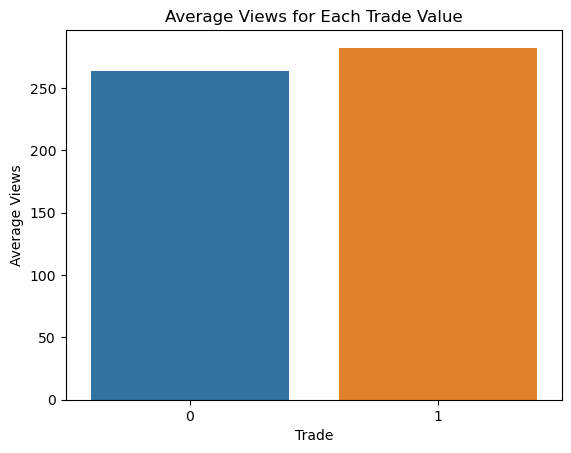

In [156]:
# Create a bar plot to compare average 'views' for each value of 'trade'
sns.barplot(x='trade', y='views', data=df, ci=None)

# Add labels and title
plt.xlabel('Trade')
plt.ylabel('Average Views')
plt.title('Average Views for Each Trade Value')

# Show the plot
plt.show()

There is no significant difference in views wrt trade.

### <div class = 'alert alert-danger'> Displays - Feature Importance</div>

In [157]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               14092 non-null  object        
 1   type_id             20498 non-null  int64         
 2   type_name           20498 non-null  object        
 3   active              20498 non-null  int64         
 4   suspended           20498 non-null  int64         
 5   username            20498 non-null  object        
 6   price               20498 non-null  int64         
 7   cost                20498 non-null  int64         
 8   num_photos          20498 non-null  int64         
 9   seller_type_id      20498 non-null  int64         
 10  trade               20498 non-null  int64         
 11  video               20498 non-null  int64         
 12  boost               20498 non-null  int64         
 13  boost_active        20498 non-null  int64     

In [158]:
df_Features = performance_metrics.drop(['title','type_name','username','createdon'],axis =1)

In [159]:
# introducing dummy variables for categorical features
data_dummy=pd.get_dummies(df_determiners,drop_first=True)
data_dummy.shape

(20498, 38)

In [160]:
y = data_dummy['displays']

In [161]:
X = data_dummy.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [162]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [163]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [165]:
# making predictions

yhat=reg.predict(x_train)

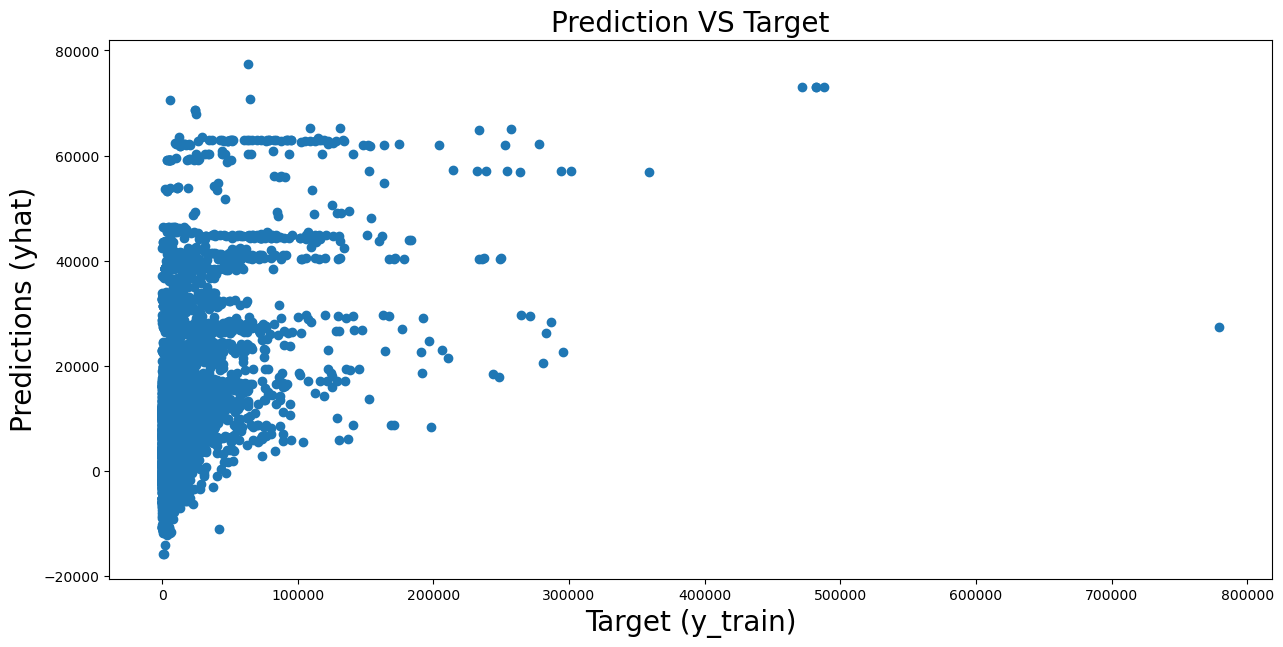

In [166]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [167]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.2303451427138402

In [168]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.22888728492477317

In [169]:
reg.intercept_

9255.978422916227

In [170]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features        Weight
9               top_ad  12061.511072
4            suspended   9379.171669
27               video   6579.734176
18       paying_trader   3129.522518
12  highlighted_active   3100.465818
2               active   2948.344801
1               cat_id   2797.902486
23           map_on_ad   1856.726599
29         enable_maps   1203.925679
24            reply_me    823.989231
28           emailable    823.989231
21          num_photos    663.820180
7            county_id    624.294457
26               trade    617.636190
6            region_id    590.154655
13               boost    566.987548
30      photos_removed    417.687410
15        video_active    284.212683
0              type_id    272.782404
20               photo    159.769227
5             approved     42.505841
25               price    -88.828433
17          package_id   -828.019348
8          user_active   -850.998585
10       top_ad_active  -1762.993197
22      seller_type_id  -2056.116610
11         highlighted  -2764.500912
3              ad_sold  -2925.200300
16     umphotos_active  -3902.308115
19          premium_ad  -4522.839253
14        boost_active  -7619.856908

### Contacts -Feature Importance

In [171]:
# introducing dummy variables for categorical features
data_dummy=pd.get_dummies(df_determiners,drop_first=True)
data_dummy.shape

(20498, 38)

In [172]:
y = df_determiners['contacts']

In [173]:
X = df_determiners.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [174]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [175]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [176]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [177]:
# making predictions

yhat=reg.predict(x_train)

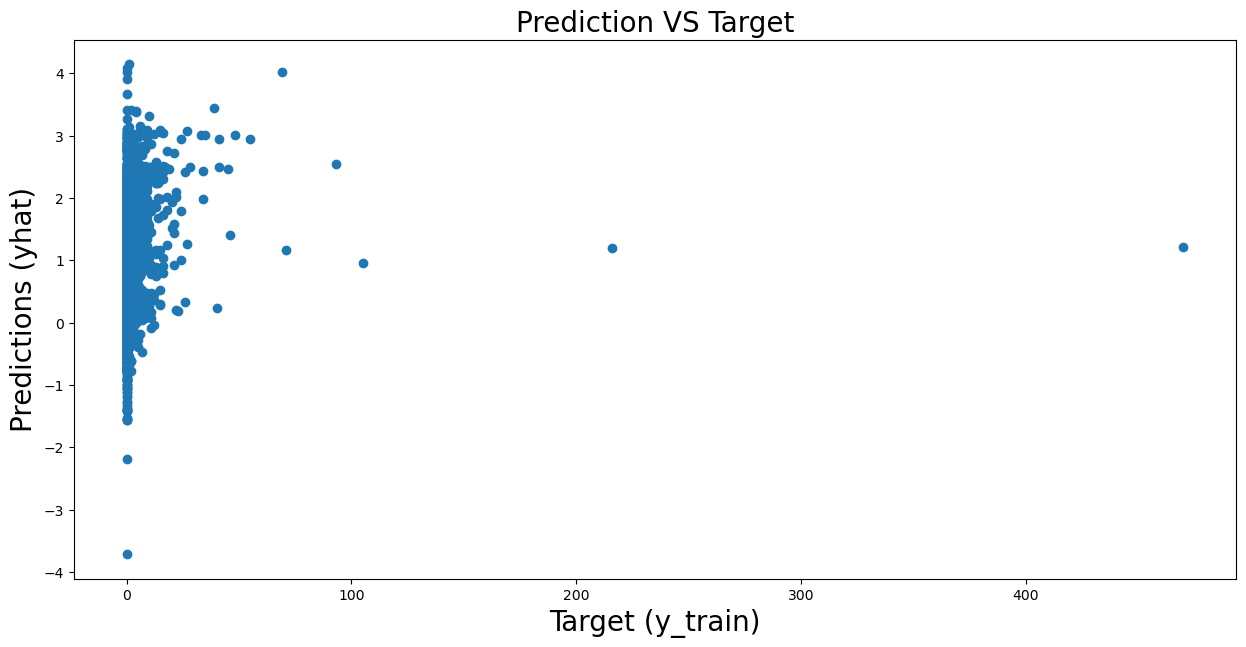

In [178]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [179]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.020635524277202055

In [180]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.01878044064360762

In [181]:
reg.intercept_

0.4811382357890485

In [182]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features    Weight
4            suspended  0.612992
10       top_ad_active  0.326645
29         enable_maps  0.233978
2               active  0.233490
0              type_id  0.221130
1               cat_id  0.183132
13               boost  0.148617
24            reply_me  0.127401
28           emailable  0.127401
27               video  0.119587
20               photo  0.118897
30      photos_removed  0.111804
21          num_photos  0.072988
6            region_id  0.066440
11         highlighted  0.053300
15        video_active  0.046528
7            county_id  0.022706
19          premium_ad  0.006687
16     umphotos_active -0.005518
5             approved -0.006424
17          package_id -0.023193
14        boost_active -0.099741
12  highlighted_active -0.104365
25               price -0.105605
18       paying_trader -0.146301
26               trade -0.240948
8          user_active -0.283397
9               top_ad -0.296300
3              ad_sold -0.340580
23           map_on_ad -0.387077
22      seller_type_id -0.406981

### Views_photos - Feature Importance

In [183]:
y = df_determiners['views_photo']

In [184]:
X = df_determiners.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [185]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [186]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [187]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [188]:
# making predictions

yhat=reg.predict(x_train)

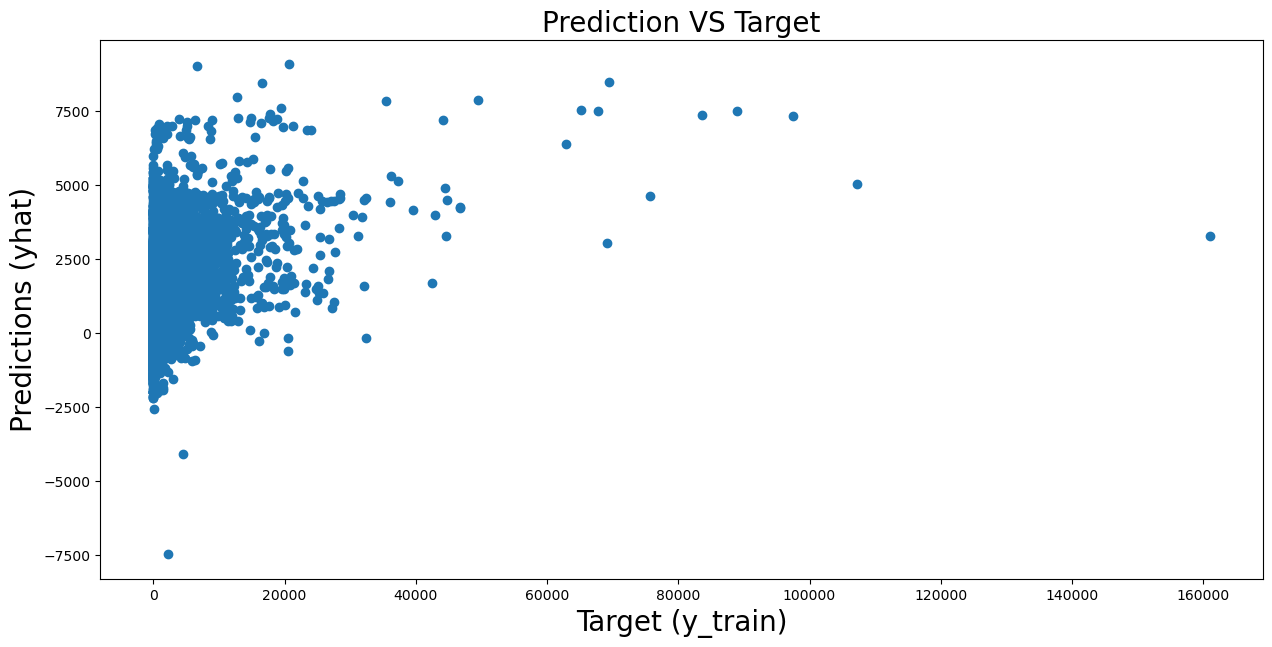

In [189]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [190]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.12440795754898404

In [191]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.12274943663269522

In [192]:
reg.intercept_

1122.5891882390774

In [193]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features      Weight
4            suspended  937.107976
21          num_photos  704.659152
27               video  593.831820
10       top_ad_active  571.427852
1               cat_id  416.519227
0              type_id  361.752269
11         highlighted  325.144946
13               boost  316.159473
2               active  265.006393
24            reply_me  193.553520
28           emailable  193.553520
20               photo  175.172449
26               trade  109.427075
14        boost_active   96.122736
7            county_id   76.507235
29         enable_maps   35.664351
23           map_on_ad    3.931932
5             approved    3.198679
30      photos_removed  -15.102668
15        video_active  -37.259521
6            region_id  -56.012032
8          user_active  -73.282959
17          package_id -119.930140
19          premium_ad -123.985367
18       paying_trader -154.317810
12  highlighted_active -229.505992
25               price -246.408681
16     umphotos_active -251.136702
3              ad_sold -341.863534
9               top_ad -561.231961
22      seller_type_id -670.981100

### URL Click - Feature Importance

In [194]:
y = df_determiners['url_click']

In [195]:
X = df_determiners.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [196]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [197]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [198]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [199]:
# making predictions

yhat=reg.predict(x_train)

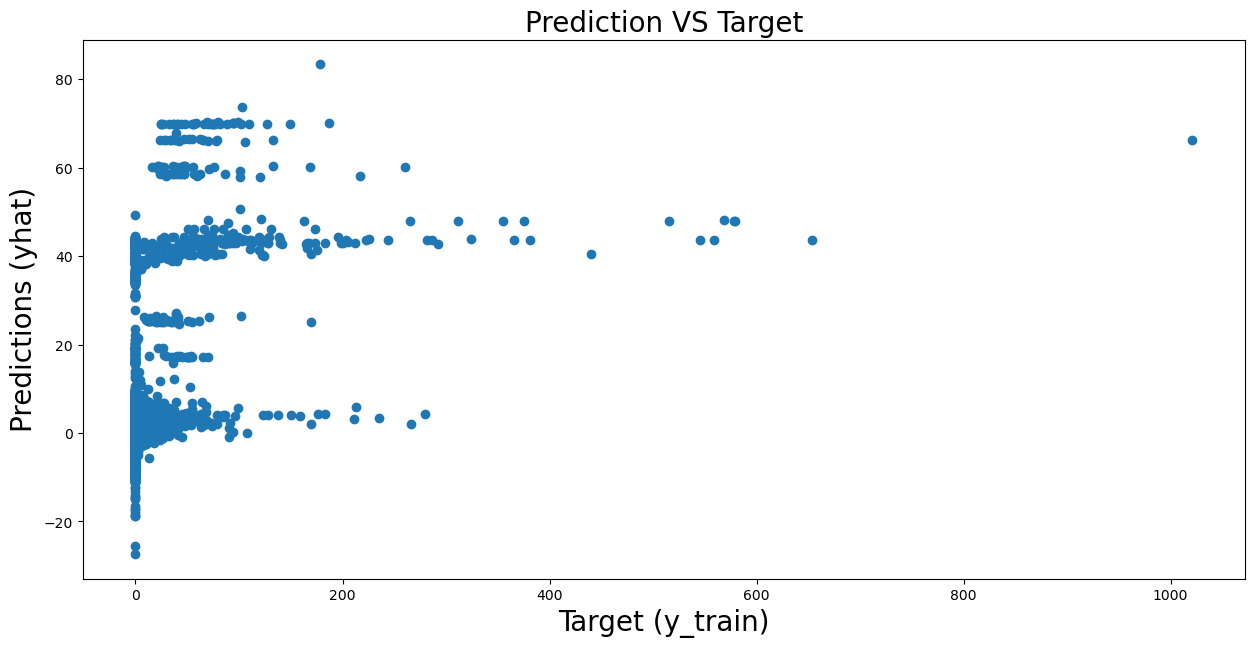

In [200]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [201]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.18388954813250113

In [202]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.18234369551073082

In [203]:
reg.intercept_

3.2836872686062986

In [204]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features     Weight
9               top_ad   9.339916
14        boost_active   7.787616
4            suspended   7.460612
11         highlighted   5.498914
29         enable_maps   3.576359
22      seller_type_id   2.921243
27               video   2.634150
28           emailable   1.629397
24            reply_me   1.629397
0              type_id   1.575794
1               cat_id   1.539144
3              ad_sold   0.712283
26               trade   0.560628
25               price   0.543973
15        video_active   0.451443
7            county_id   0.214645
5             approved   0.049137
20               photo   0.001111
10       top_ad_active  -0.078296
2               active  -0.119681
21          num_photos  -0.187554
8          user_active  -0.295397
30      photos_removed  -0.559871
6            region_id  -0.727183
18       paying_trader  -1.037498
19          premium_ad  -1.065306
16     umphotos_active  -1.283771
17          package_id  -2.088775
23           map_on_ad  -3.293561
12  highlighted_active  -7.875493
13               boost -15.333509

### Print Click -Feature Importance

In [205]:
y = df_determiners['print_click']

In [206]:
X = df_determiners.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [207]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [208]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [209]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [210]:
# making predictions

yhat=reg.predict(x_train)

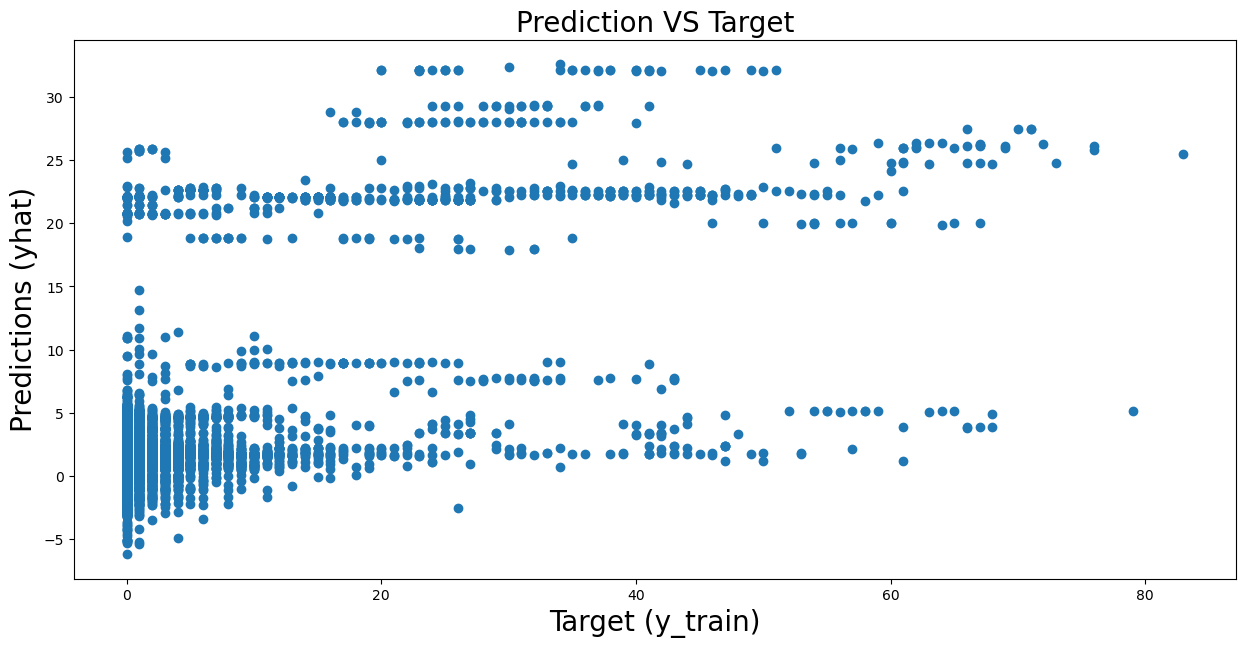

In [211]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [212]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.3978984911754958

In [213]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.39675800805356254

In [214]:
reg.intercept_

2.3587777061729973

In [215]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features    Weight
4            suspended  4.511000
9               top_ad  3.297129
29         enable_maps  2.832255
14        boost_active  1.793723
27               video  1.749401
26               trade  0.982750
0              type_id  0.744295
1               cat_id  0.585359
28           emailable  0.541373
24            reply_me  0.541373
11         highlighted  0.474709
18       paying_trader  0.466410
2               active  0.437827
30      photos_removed  0.321577
15        video_active  0.097273
7            county_id  0.082933
20               photo  0.016974
21          num_photos -0.037729
5             approved -0.062838
6            region_id -0.064173
25               price -0.076873
12  highlighted_active -0.119219
10       top_ad_active -0.324842
8          user_active -0.442092
19          premium_ad -0.561270
3              ad_sold -0.842446
17          package_id -0.984676
22      seller_type_id -1.010378
16     umphotos_active -2.106011
23           map_on_ad -2.602705
13               boost -4.375534

### Print Phone - Feature Importance

In [216]:
y = df_determiners['print_phone']

In [217]:
X = df_determiners.drop(columns = ['views','contacts','displays','views_photo','url_click','print_click','print_phone'])

In [218]:
#standardizing
scaler=StandardScaler()
scaler.fit(X) 
x=scaler.transform(X)

In [219]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [220]:
# Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [221]:
# making predictions

yhat=reg.predict(x_train)

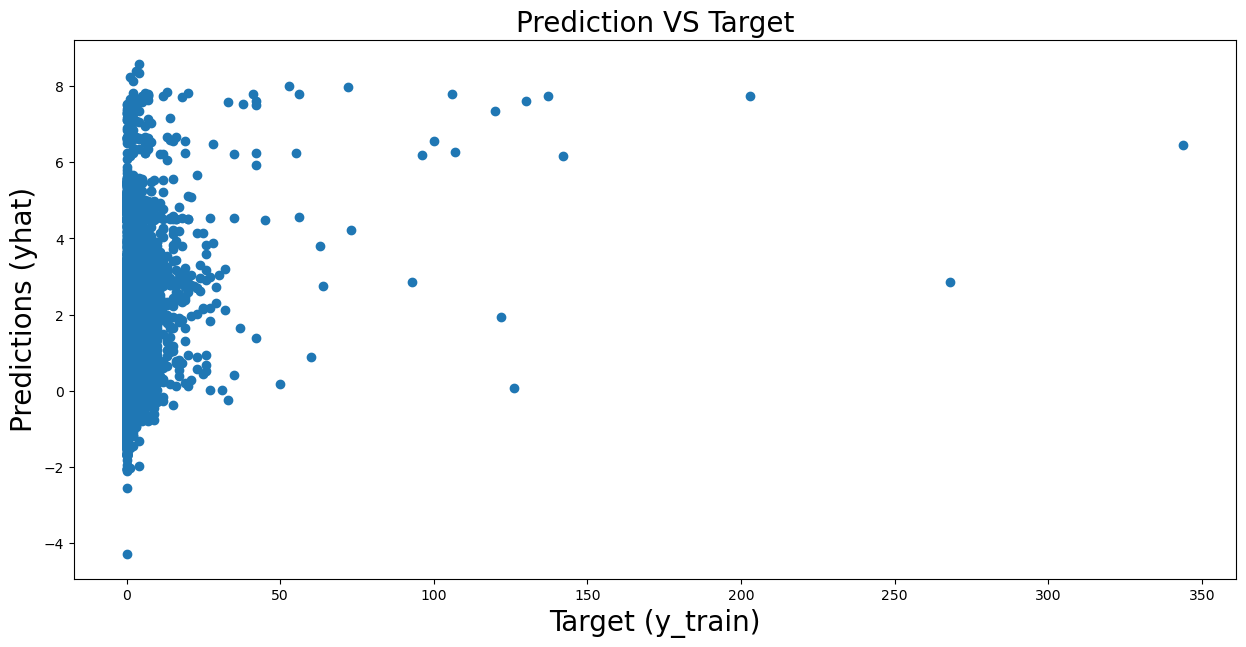

In [222]:
# Expected vs Predicted plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

In [223]:
# Evaluation using R2
R2=reg.score(x_train,y_train)
R2

0.055303878245993254

In [224]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.05351446239762625

In [225]:
reg.intercept_

0.8531617668313404

In [226]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary.sort_values(by='Weight',ascending=False)

Features    Weight
4            suspended  1.309945
14        boost_active  0.765372
9               top_ad  0.556081
27               video  0.514727
11         highlighted  0.415663
2               active  0.395165
18       paying_trader  0.279401
30      photos_removed  0.252679
21          num_photos  0.246028
1               cat_id  0.211653
20               photo  0.138658
29         enable_maps  0.137366
28           emailable  0.057653
24            reply_me  0.057653
7            county_id  0.040154
6            region_id  0.022130
16     umphotos_active  0.009951
15        video_active -0.006539
5             approved -0.033399
17          package_id -0.076855
25               price -0.157988
0              type_id -0.158257
8          user_active -0.215227
23           map_on_ad -0.246082
19          premium_ad -0.278358
26               trade -0.396365
10       top_ad_active -0.467713
3              ad_sold -0.486713
13               boost -0.627342
12  highlighted_active -0.683199
22      seller_type_id -0.855476

# <div class='alert alert-info'> Trend Analysis</div>

### <div class='alert alert-warning'>Ads Posted</div>

In [227]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               14092 non-null  object        
 1   type_id             20498 non-null  int64         
 2   type_name           20498 non-null  object        
 3   active              20498 non-null  int64         
 4   suspended           20498 non-null  int64         
 5   username            20498 non-null  object        
 6   price               20498 non-null  int64         
 7   cost                20498 non-null  int64         
 8   num_photos          20498 non-null  int64         
 9   seller_type_id      20498 non-null  int64         
 10  trade               20498 non-null  int64         
 11  video               20498 non-null  int64         
 12  boost               20498 non-null  int64         
 13  boost_active        20498 non-null  int64     

In [228]:
df_trend = performance_metrics

In [229]:
# Group by month and count the entries
df_trend['month'] = df_trend['createdon'].dt.month  # Extract month from datetime
df_trend['year'] = df_trend['createdon'].dt.year

In [230]:
monthly_counts = df_trend.groupby(['year','month']).agg(ad_count=('title','count')).reset_index()

In [231]:
monthly_counts.sort_values(by=['year','month'])

year  month  ad_count
0   2015      6         2
1   2015      8         2
2   2015     11         2
3   2015     12         1
4   2016      2         2
..   ...    ...       ...
81  2023      4       883
82  2023      5      3513
83  2023      6      1057
84  2023      7      1147
85  2023      8       227

[86 rows x 3 columns]

In [232]:
df_trend2 = performance_metrics

In [233]:
df_trend2['month'] = df_trend2['createdon'].dt.month  # Extract month from datetime
monthly_counts = df_trend2.groupby('month')['createdon'].count()

In [234]:
monthly_counts

month
1     1557
2     1561
3     2186
4     1546
5     4177
6     2155
7     2507
8     2196
9      700
10     722
11     760
12     431
Name: createdon, dtype: int64

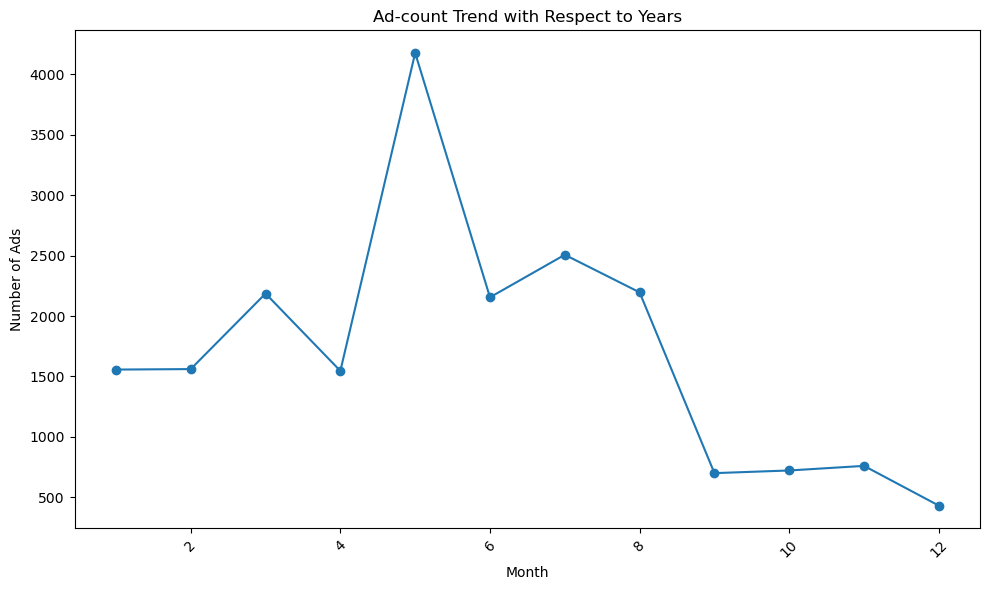

In [235]:
# Plot a line chart to analyze the sales trend with respect to months
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Ad-count Trend with Respect to Years')
plt.xlabel('Month')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [236]:
df_trend2.columns

Index(['title', 'type_id', 'type_name', 'active', 'suspended', 'username',
       'price', 'cost', 'num_photos', 'seller_type_id', 'trade', 'video',
       'boost', 'boost_active', 'views', 'business_url_click', 'contacts',
       'displays', 'views_photo', 'url_click', 'print_click', 'print_phone',
       'days_running', 'createdon', 'ad_approved', 'expired', 'month', 'year'],
      dtype='object')

In [237]:
monthly_counts = df_trend.groupby(['year','month']).agg(ad_count=('title','count')).reset_index()

In [238]:
monthly_counts.sort_values(by=['year','month'])

year  month  ad_count
0   2015      6         2
1   2015      8         2
2   2015     11         2
3   2015     12         1
4   2016      2         2
..   ...    ...       ...
81  2023      4       883
82  2023      5      3513
83  2023      6      1057
84  2023      7      1147
85  2023      8       227

[86 rows x 3 columns]

In [239]:
df_trend2 = performance_metrics

In [240]:
df_trend2['year'] = df_trend2['createdon'].dt.year  # Extract month from datetime
yearly_counts = df_trend2.groupby('year')['createdon'].count()

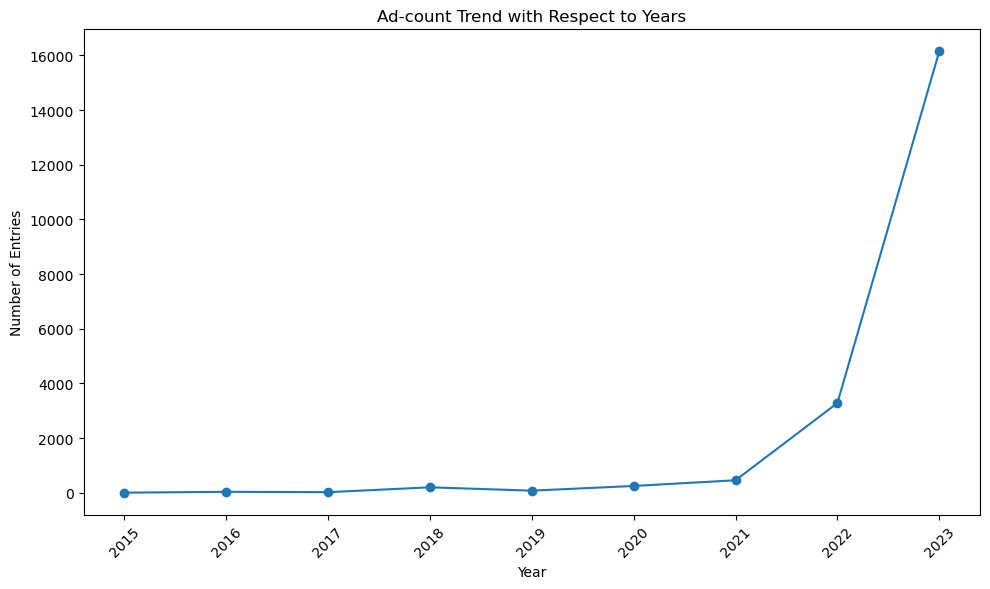

In [241]:
# Plot a line chart to analyze the sales trend with respect to months
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Ad-count Trend with Respect to Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <div class = 'alert alert-warning'>Views Trend by users</div>

In [242]:
monthly_counts = df_trend2.groupby('month').agg(view_count=('views','sum')).reset_index()

In [243]:
monthly_counts

month  view_count
0       1      666188
1       2      617536
2       3      639006
3       4      347094
4       5      407178
5       6      413499
6       7      594711
7       8      533978
8       9      469784
9      10      407710
10     11      382675
11     12      233312

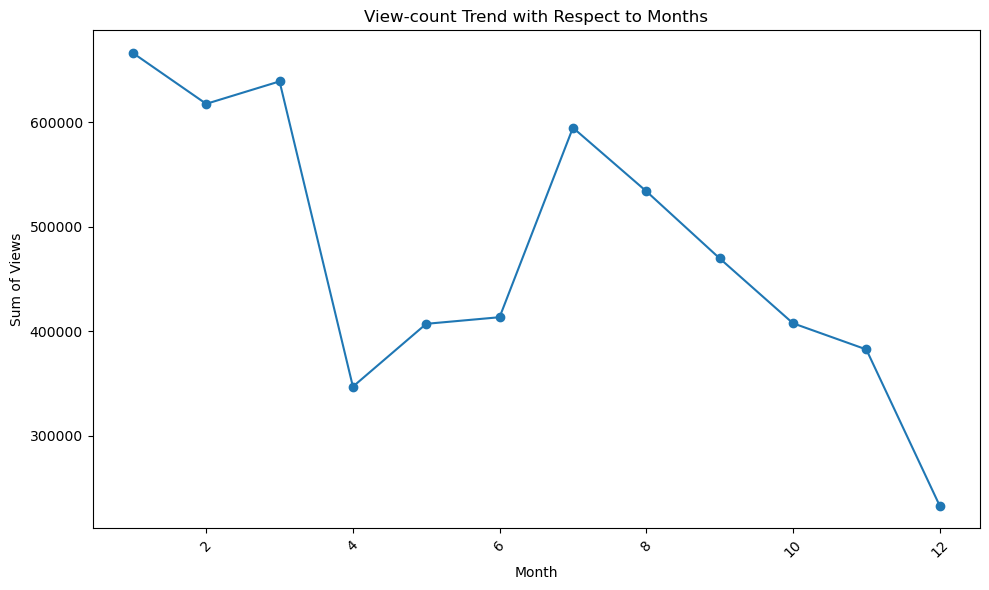

In [244]:
# Plot a line chart to analyze the sales trend with respect to months
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.month, monthly_counts.view_count, marker='o')
plt.title('View-count Trend with Respect to Months')
plt.xlabel('Month')
plt.ylabel('Sum of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [245]:
yearly_counts = df_trend2.groupby('year').agg(view_count=('views','sum')).reset_index()

In [246]:
yearly_counts

year  view_count
0  2015       32009
1  2016      109112
2  2017      132703
3  2018      411316
4  2019      115115
5  2020      248671
6  2021      348923
7  2022     1590322
8  2023     2724500

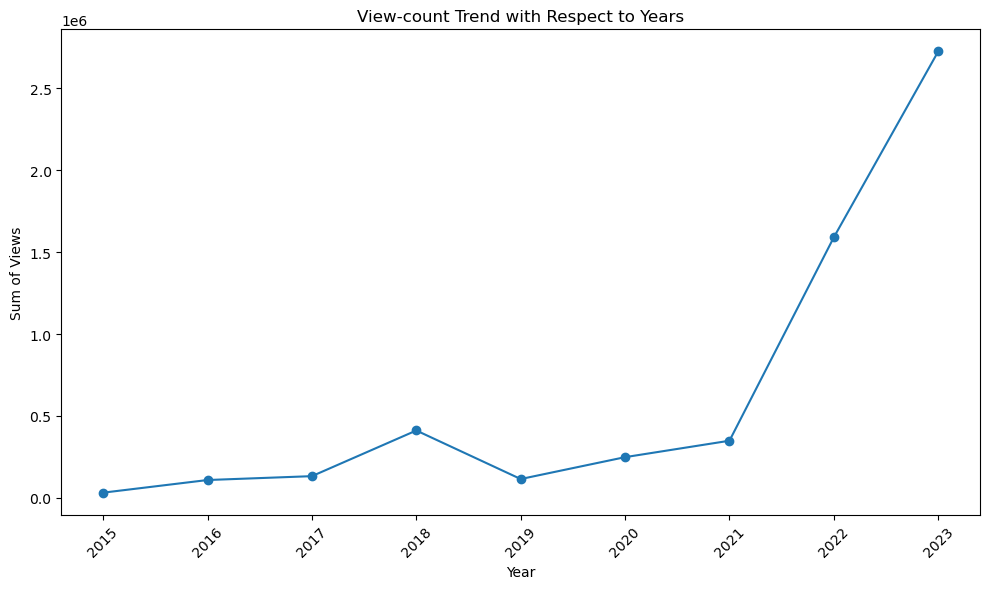

In [247]:
# Plot a line chart to analyze the sales trend with respect to months
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.year, yearly_counts.view_count, marker='o')
plt.title('View-count Trend with Respect to Years')
plt.xlabel('Year')
plt.ylabel('Sum of Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <div class = 'alert alert-warning'>Overall Ad-post trend</div>

In [248]:
df_bar = df.copy()

In [249]:
df_bar.shape

(20498, 359)

In [250]:
df_bar.columns

Index(['id', 'main_id', 'item_type_id', 'guid', 'supertype_id', 'paa_step1',
       'type_id', 'type_name', 'type_import', 'cat_id',
       ...
       'performance', 'days_running', 'score', 'partnership_id', 'spidersnet',
       'user_edited_on', 'createdby', 'createdon', 'editedby', 'editedon'],
      dtype='object', length=359)

In [251]:
df_bar['createdon'] = pd.to_datetime(df_bar['createdon'])

In [252]:
# Group by month and count the entries
df_bar['month'] = df_bar['createdon'].dt.to_period('M')  # Extract month from datetime
df_bar['year'] = df_bar['createdon'].dt.year

df_counts = df_bar.groupby('month').agg(ad_count=('id','count')).reset_index()
df_counts['month'] = df_counts['month'].dt.strftime('%Y-%m')


df_counts

month  ad_count
0   2015-06         2
1   2015-08         2
2   2015-11         2
3   2015-12         1
4   2016-02         2
..      ...       ...
81  2023-04      1450
82  2023-05      4025
83  2023-06      1911
84  2023-07      2193
85  2023-08      1840

[86 rows x 2 columns]

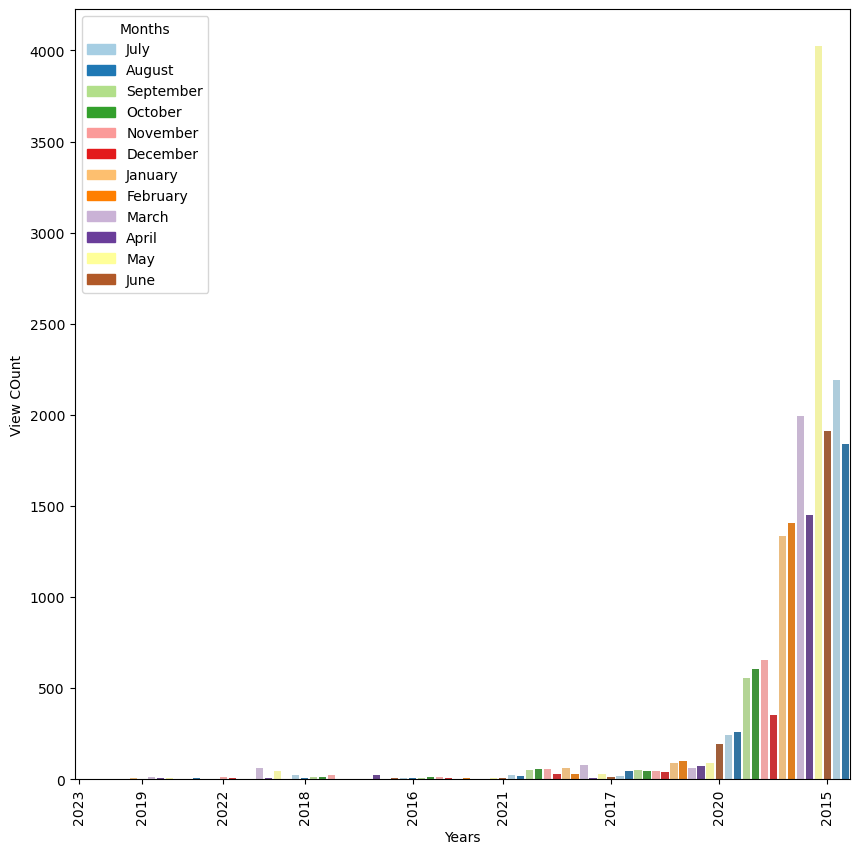

<Figure size 640x480 with 0 Axes>

In [253]:
palette = sns.color_palette("Paired")
ax = sns.barplot(x=df_counts.month, y=df_counts.ad_count, dodge=False, palette=palette)

# set ticks halfway through the year
xticks = []
for idx, full_date in enumerate(df_counts['month']):
    if full_date[-2:] == "06":
        xticks.append(idx)
ax.set_xticks(xticks)

# use year as the label and make them vertical
years = df_bar["year"].unique()
ax.set_xticklabels(years, rotation=90)

# setting plot labels
ax.set_xlabel("Years")
ax.set_ylabel("View COunt")

# sync colors to month order
months = ["July", "August", "September", "October", "November", "December","January", "February", "March", "April", "May","June"]
handles = []
for idx, month in enumerate(months):
    handles.append(mpatches.Patch(color=palette[idx%12], label=month))

ax.legend(handles = handles, title="Months")

plt.figure()
ax.figure.set_size_inches(10,10)
fig = ax.get_figure()

### <div class = 'alert alert-warning'>Overall Views-count trend</div>

In [254]:
df_counts = df_bar.groupby('month').agg(view_count=('views','sum')).reset_index()
df_counts['month'] = df_counts['month'].dt.strftime('%Y-%m')


df_counts

month  view_count
0   2015-06       15038
1   2015-08       10862
2   2015-11        4413
3   2015-12        1696
4   2016-02        3324
..      ...         ...
81  2023-04      286525
82  2023-05      235657
83  2023-06      257903
84  2023-07      379388
85  2023-08      255541

[86 rows x 2 columns]

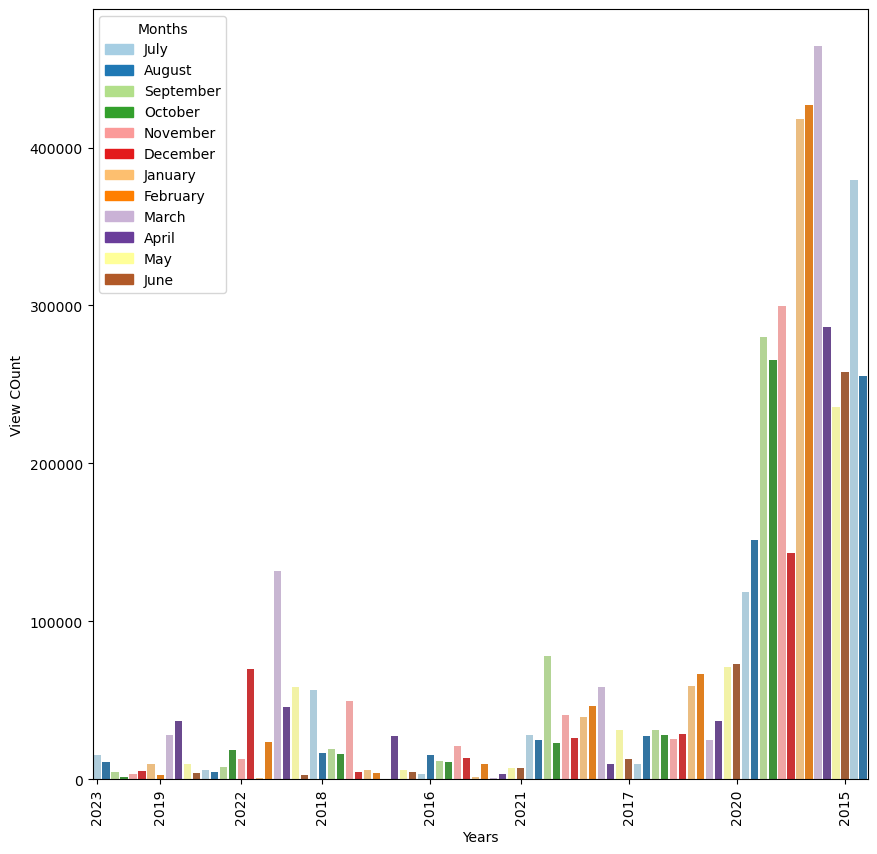

<Figure size 640x480 with 0 Axes>

In [255]:
palette = sns.color_palette("Paired")
ax = sns.barplot(x=df_counts.month, y=df_counts.view_count, dodge=False, palette=palette)

# set ticks halfway through the year
xticks = []
for idx, full_date in enumerate(df_counts['month']):
    if full_date[-2:] == "06":
        xticks.append(idx)
ax.set_xticks(xticks)

# use year as the label and make them vertical
years = df_bar["year"].unique()
ax.set_xticklabels(years, rotation=90)

# setting plot labels
ax.set_xlabel("Years")
ax.set_ylabel("View COunt")

# sync colors to month order
months = ["July", "August", "September", "October", "November", "December","January", "February", "March", "April", "May","June"]
handles = []
for idx, month in enumerate(months):
    handles.append(mpatches.Patch(color=palette[idx%12], label=month))

ax.legend(handles = handles, title="Months")

plt.figure()
ax.figure.set_size_inches(10,10)
fig = ax.get_figure()

### <div class = 'alert alert-warning'>Overall Ad-count trend 2023</div>

In [256]:
df_bar = performance_metrics[performance_metrics['createdon'].dt.year == 2023]

In [257]:
# Group by month and count the entries
df_bar['month'] = df_bar['createdon'].dt.to_period('M')  # Extract month from datetime
df_counts = df_bar.groupby('month')['createdon'].count()

In [258]:
df_counts

month
2023-01    1334
2023-02    1404
2023-03    1991
2023-04    1450
2023-05    4025
2023-06    1911
2023-07    2193
2023-08    1840
Freq: M, Name: createdon, dtype: int64

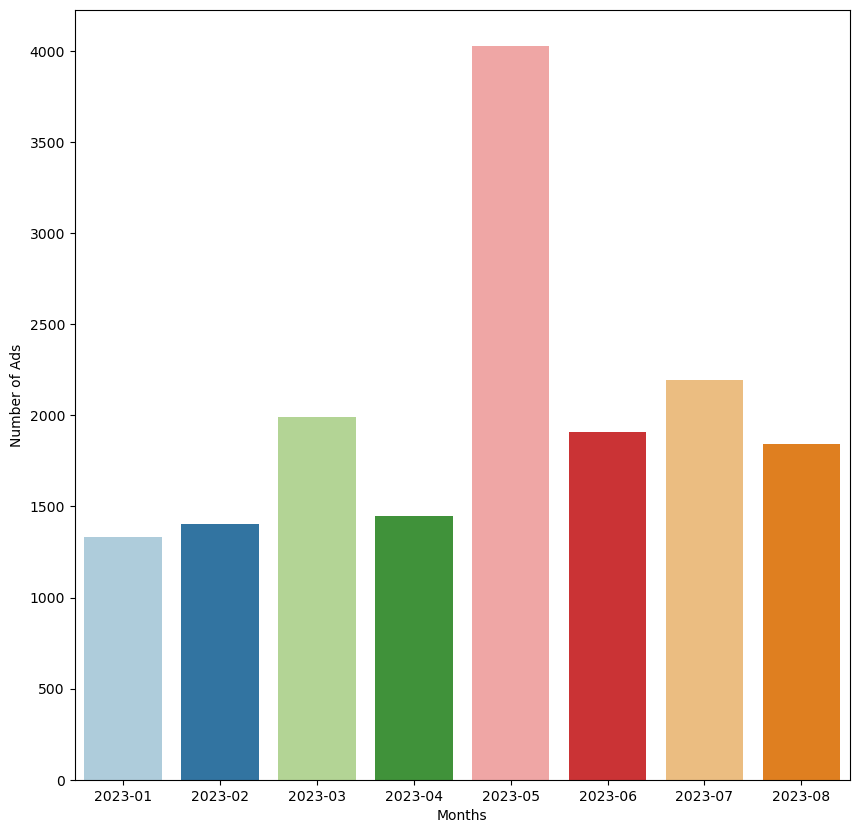

<Figure size 640x480 with 0 Axes>

In [259]:
palette = sns.color_palette("Paired")
ax = sns.barplot(x=df_counts.index, y=df_counts.values, dodge=False, palette=palette)

# setting plot labels
ax.set_xlabel("Months")
ax.set_ylabel("Number of Ads")

plt.figure()
ax.figure.set_size_inches(10,10)
fig = ax.get_figure()

### <div class = 'alert alert-warning'>Overall Views trend 2023</div>

In [260]:
df_bar = performance_metrics[performance_metrics['createdon'].dt.year == 2023]

In [261]:
# Group by month and count the entries
df_bar['month'] = df_bar['createdon'].dt.to_period('M')  # Extract month from datetime
df_counts = df_bar.groupby('month').agg(view_count=('views','sum')).reset_index()

In [262]:
df_counts

month  view_count
0  2023-01      417958
1  2023-02      427133
2  2023-03      464395
3  2023-04      286525
4  2023-05      235657
5  2023-06      257903
6  2023-07      379388
7  2023-08      255541

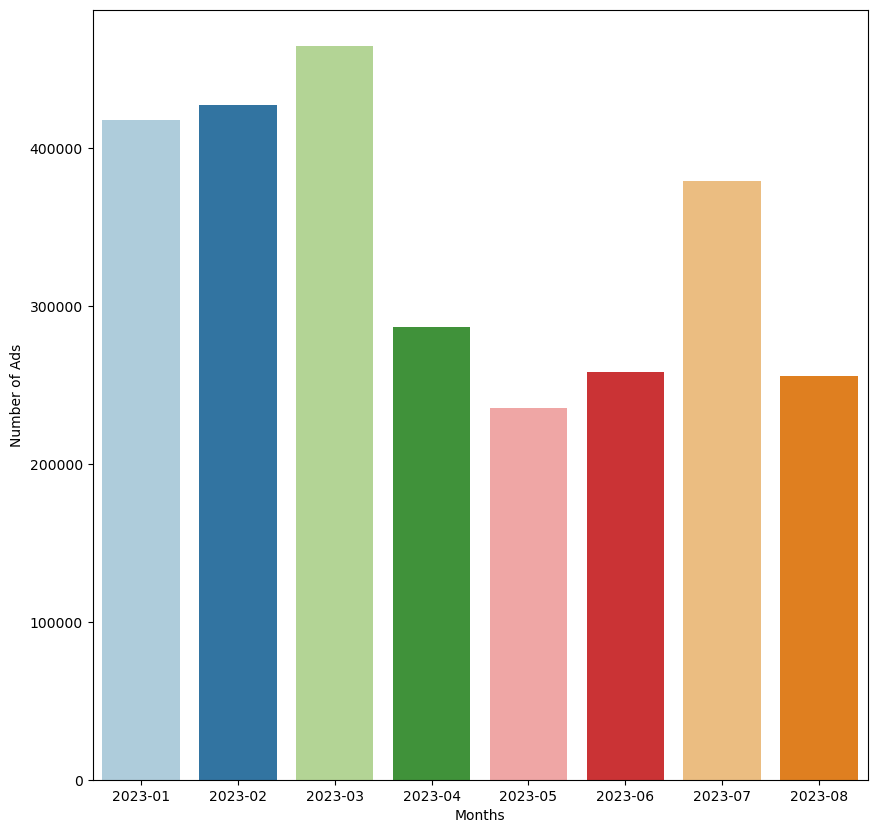

<Figure size 640x480 with 0 Axes>

In [263]:
palette = sns.color_palette("Paired")
ax = sns.barplot(x=df_counts.month, y=df_counts.view_count, dodge=False, palette=palette)

# setting plot labels
ax.set_xlabel("Months")
ax.set_ylabel("Number of Ads")

plt.figure()
ax.figure.set_size_inches(10,10)
fig = ax.get_figure()

# <div class='alert alert-info'> Archie's Req</div>

In [264]:
df.head()

id  main_id  item_type_id                                  guid  \
0  1310720        0             0  8e24b0e4-acd7-4ea4-bf54-9cc380a36c3f   
1  1311488        0             0  2e4a3982-2b59-4e61-a8a9-0a7a1c4768fc   
2  1312256        0             0  99b03902-b2c4-4a09-8393-3d5edb9cc30b   
3  1313024        0             0  e3a1afa7-339c-4ea3-bb82-4f0133bfe881   
4  1315584        0             0  d0343985-84aa-4084-a42b-a58b68de90a0   

   supertype_id paa_step1  type_id   type_name  type_import  cat_id  ...  \
0             0       NaN        7  Motorhomes            0       0  ...   
1             0       NaN        7  Motorhomes            0       0  ...   
2             0       NaN        7  Motorhomes            0       0  ...   
3             0       NaN        7  Motorhomes            0       0  ...   
4             0       NaN        7  Motorhomes            0       0  ...   

  performance  days_running  score  partnership_id  spidersnet  \
0           0             0      0               0           0   
1           0             0      0               0           0   
2           0             0      0               0           0   
3           0             0      0               0           0   
4           0             0      0               0           0   

        user_edited_on  createdby            createdon  editedby  \
0  2023-03-28 11:50:11     import  2023-03-01 11:41:38    (none)   
1  2023-07-29 15:04:28     import  2023-03-05 11:40:21    (none)   
2  2023-07-12 05:22:43     import  2023-03-08 11:40:12    (none)   
3  2023-03-16 11:40:16     import  2023-03-11 11:40:42    (none)   
4  2023-07-07 01:00:53     import  2023-03-21 15:42:16    (none)   

              editedon  
0  2023-08-11 23:43:02  
1  2023-08-07 23:43:28  
2  2023-08-11 23:43:20  
3  2023-08-07 23:43:05  
4  2023-08-07 23:43:20  

[5 rows x 359 columns]

In [265]:
df.shape

(20498, 359)

In [266]:
df['caotw'].value_counts()

caotw
0    20393
1      105
Name: count, dtype: int64

In [267]:
df['hppremium'].value_counts()

hppremium
0    20484
1       14
Name: count, dtype: int64

In [268]:
df.package_id.value_counts()

package_id
61    9461
52    3573
57    2968
51    2344
70     691
54     657
63     449
53     261
0       94
Name: count, dtype: int64

In [269]:
performa = df[['id','type_id','type_name','package_id','active','suspended','approved','price','cost','num_photos','seller_type_id','trade','video','boost','boost_active','caotw','hppremium','views','business_url_click','contacts','displays','views_photo','url_click','print_click','print_phone','days_running','createdon']]

In [270]:
performa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20498 entries, 0 to 20497
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20498 non-null  int64 
 1   type_id             20498 non-null  int64 
 2   type_name           20498 non-null  object
 3   package_id          20498 non-null  int64 
 4   active              20498 non-null  int64 
 5   suspended           20498 non-null  int64 
 6   approved            20498 non-null  int64 
 7   price               20498 non-null  int64 
 8   cost                20498 non-null  int64 
 9   num_photos          20498 non-null  int64 
 10  seller_type_id      20498 non-null  int64 
 11  trade               20498 non-null  int64 
 12  video               20498 non-null  int64 
 13  boost               20498 non-null  int64 
 14  boost_active        20498 non-null  int64 
 15  caotw               20498 non-null  int64 
 16  hppremium           20

In [271]:
performa['createdon'] = pd.to_datetime(performa['createdon'])

In [272]:
performa['conversions_total'] = performa['contacts']+performa['print_click'] + performa['print_phone']

In [273]:
dealer_mapping = {52: 1, 57: 1, 61: 1, 70: 1}

In [274]:
performa['dealer'] = performa['package_id'].apply(lambda x: 1 if x in dealer_mapping else 0)

In [ ]:
performa['year'] = performa['createdon'].dt.year
performa['month'] = performa['createdon'].dt.month

In [275]:
performa.shape

(20498, 29)

In [276]:
performa =performa[performa['package_id'] != 0]

In [277]:
performa.shape

(20404, 29)

## <div class = 'alert alert-warning'>1</div>

In [278]:
performa_type = performa.groupby('type_name').agg({'contacts' : 'mean', 'print_phone' : 'mean', 'print_click':'mean'})

In [279]:
performa_type

contacts  print_phone  print_click
type_name                                           
Accessories       0.453426     0.324095     2.420323
Campervans        0.810174     1.317618     5.259305
For Hire          0.003012     0.005723     0.183434
Lodge             1.073276     2.547414     6.581897
Motorhomes        0.425878     0.516787     1.806224
Services          0.142857     0.142857     0.428571
Static Caravans   0.468571     1.130110     4.057582
Touring Caravans  0.749027     1.596569     2.420941
Towing Vehicles   0.199248     0.210526     9.142857
Wanted            0.727273     1.227273     9.136364

In [280]:
performa_type.to_csv('1a_conversions_per_adtype.csv')

In [281]:
performa_package = performa.groupby(['dealer','package_id']).agg({'contacts' : 'mean', 'print_phone' : 'mean', 'print_click':'mean'})

In [282]:
performa_package

contacts  print_phone  print_click
dealer package_id                                    
0      51          1.072099     1.356229     1.930887
       53          1.954023     4.015326     1.394636
       54          2.018265     3.388128     1.417047
       63          1.342984     2.726058     1.017817
1      52          0.157571     0.422334     0.982648
       57          0.308288     0.508423     3.164757
       61          0.313709     0.642004     2.649191
       70          0.364689     0.545586     3.777135

In [283]:
performa_package.to_csv('1b_conversions_per_ad.csv')

## <div class = 'alert alert-warning'>2</div>

In [284]:
performa_hpp = performa[performa['hppremium']==1]

In [285]:
performa_hpp.shape

(14, 29)

In [286]:
performa_caotw = performa[performa['caotw']==1]

In [287]:
performa_caotw.shape

(105, 29)

In [288]:
performa_caotw_conv = performa.groupby(['caotw']).agg({'contacts' : 'mean', 'print_phone' : 'mean', 'print_click':'mean', 'views':'mean'})
performa_caotw_conv

contacts  print_phone  print_click       views
caotw                                                
0      0.465589     0.830287     2.298044  274.579487
1      1.895238     2.780952     1.980952  733.809524

In [289]:
performa_caotw_conv.to_csv('2a_catOfTheWeek.csv')

In [290]:
performa_hpp_conv = performa.groupby(['hppremium']).agg({'contacts' : 'mean', 'print_phone' : 'mean', 'print_click':'mean', 'views':'mean'})
performa_hpp_conv

contacts  print_phone  print_click       views
hppremium                                                
0          0.472339     0.838303     2.297008  276.655615
1          1.357143     3.785714     1.428571  695.071429

In [291]:
performa_hpp_conv.to_csv('2b_AdOfTheWeek.csv')

## <div class = 'alert alert-warning'>3</div>

In [292]:
pd.set_option('display.max_rows', None)

# <div class = 'alert alert-info'>Additional Req</div>

In [293]:
df['createdon'] = pd.to_datetime(df['createdon'])

In [294]:
# Group by 'user_id' and count the number of ads posted by each user
user_ads_count = df.groupby(['user_id','type_name'])['id'].count().reset_index()
user_ads_count.columns = ['user_id', 'type_name', 'ads_count']

# Filter users who have posted at least 3 ads
user_ads_count = user_ads_count[user_ads_count['ads_count'] >= 3]

In [295]:
user_ads_count.sort_values(by= 'user_id')

user_id         type_name  ads_count
0        5750        Motorhomes         37
18      28328       Accessories          3
42      32040       Accessories          7
46      33202       Accessories         12
58      35363       Accessories          6
63      37442       Accessories          4
65      37654       Accessories          3
76      41861       Accessories          5
97      48625       Accessories          4
98      49451       Accessories          4
108     56232       Accessories          4
129     64641       Accessories          3
130     65600  Touring Caravans          6
144     68849       Accessories          3
145     69356   Static Caravans        363
165     76952       Accessories          5
168     78133       Accessories          5
175     80240       Accessories          5
193     89340       Accessories          3
195     89836       Accessories          4
205     93066   Static Caravans          5
236    110225       Accessories          3
237    111166       Accessories          3
239    112118        Motorhomes         30
241    112143  Touring Caravans         81
255    120961       Accessories          3
262    122550        Motorhomes          3
280    130848       Accessories          5
283    132301        Campervans         19
284    132301        Motorhomes         44
295    140120       Accessories          3
318    147983        Motorhomes          3
326    149734       Accessories          6
337    155855       Accessories          4
350    158551        Motorhomes         69
353    158596  Touring Caravans         25
354    158740        Motorhomes         21
356    158760  Touring Caravans         35
358    158778  Touring Caravans         42
357    158778        Motorhomes          8
359    158795        Motorhomes        335
360    158795  Touring Caravans        876
361    158798        Campervans         70
362    158798        Motorhomes        245
363    158803        Motorhomes        376
364    158808        Motorhomes          9
365    158808  Touring Caravans         67
366    158814  Touring Caravans         60
367    158819        Motorhomes          6
368    158819  Touring Caravans          4
370    158828        Motorhomes         42
371    158828  Touring Caravans        480
373    158831        Motorhomes         91
374    158838   Static Caravans         24
376    158845  Touring Caravans        149
378    158875        Motorhomes        135
381    158885        Campervans          3
382    158885        Motorhomes          9
383    158885  Touring Caravans         24
386    158911   Static Caravans          4
387    158911  Touring Caravans         30
388    158926        Motorhomes        240
390    158927        Motorhomes         77
392    158943        Motorhomes        105
391    158943        Campervans         28
394    158953  Touring Caravans         67
396    158955        Motorhomes          9
397    158955  Touring Caravans         61
398    158969        Motorhomes          9
400    158972        Motorhomes         44
401    158976  Touring Caravans         19
402    158980        Campervans         46
403    158980        Motorhomes        192
404    158980   Towing Vehicles          6
406    158982        Motorhomes        115
405    158982        Campervans         29
407    158984  Touring Caravans        100
409    158985  Touring Caravans         35
408    158985        Motorhomes          7
410    158997        Campervans          3
411    158997        Motorhomes         35
412    159010        Motorhomes         47
413    159010  Touring Caravans         35
414    159012  Touring Caravans         41
415    159026        Motorhomes          3
416    159026  Touring Caravans         72
417    159095  Touring Caravans         15
418    159132  Touring Caravans          3
419    159133        Motorhomes        239
420    159141        Motorhomes         69
422    159156  Touring Caravans          4
421    159156        Motorhomes         44
423    

In [296]:
user_ads_count['user_id'].nunique()

343

In [297]:
# Calculate the minimum and maximum 'createdon' for each user
user_createdon_minmax = df.groupby('user_id')['createdon'].agg(['min', 'max']).reset_index()

user_createdon_minmax

user_id                 min                 max
0        5750 2022-08-27 21:40:27 2023-07-18 14:49:30
1        6398 2020-09-02 19:02:56 2020-09-10 19:15:02
2        6738 2023-03-26 15:01:29 2023-03-26 15:01:29
3        6928 2023-08-23 20:37:16 2023-08-23 20:37:16
4        7339 2023-07-23 12:47:22 2023-08-18 13:31:08
5        7551 2022-01-30 10:22:30 2022-01-30 10:22:30
6        7891 2023-03-23 23:02:22 2023-03-23 23:02:22
7        9796 2023-06-29 11:46:47 2023-07-21 17:48:19
8       10843 2023-08-26 00:03:20 2023-08-26 00:03:20
9       11505 2022-12-08 19:01:07 2022-12-08 19:01:07
10      11995 2023-04-17 19:36:13 2023-07-03 20:13:18
11      17178 2022-10-23 23:40:05 2022-10-23 23:40:05
12      21499 2023-06-24 13:50:08 2023-08-12 11:58:52
13      23275 2022-10-10 17:40:51 2022-10-10 17:40:51
14      23640 2023-08-07 19:32:47 2023-08-07 19:32:47
15      27943 2023-08-08 09:40:34 2023-08-08 09:40:34
16      28171 2023-05-15 10:48:03 2023-05-15 10:48:03
17      28225 2023-05-01 18:38:35 2023-05-01 18:38:35
18      28328 2023-06-22 15:50:17 2023-08-19 16:36:51
19      28678 2023-08-23 14:50:59 2023-08-23 14:50:59
20      29201 2023-08-12 10:39:45 2023-08-25 09:14:30
21      29239 2023-02-25 15:04:51 2023-02-25 15:04:51
22      29322 2023-07-15 10:55:39 2023-07-15 10:55:39
23      29416 2023-03-08 12:27:36 2023-03-08 12:27:36
24      29535 2023-08-19 15:30:58 2023-08-23 08:31:19
25      29625 2023-08-02 15:57:26 2023-08-02 18:01:19
26      29674 2023-01-20 11:06:42 2023-01-20 11:06:42
27      29896 2023-08-11 19:29:25 2023-08-11 19:29:25
28      30029 2023-03-25 14:40:10 2023-08-07 20:50:08
29      30040 2023-08-13 22:07:01 2023-08-30 12:54:01
30      30218 2023-07-15 21:33:51 2023-07-15 21:33:51
31      30226 2023-03-09 15:31:08 2023-03-09 15:31:08
32      30520 2023-04-17 17:18:31 2023-04-17 17:18:31
33      30777 2022-06-08 22:40:08 2022-06-08 22:40:08
34      31337 2023-07-27 18:00:17 2023-08-14 16:00:49
35      31401 2023-03-26 11:23:51 2023-03-26 11:23:51
36      31583 2023-08-10 13:13:29 2023-08-10 13:13:29
37      31959 2023-02-14 22:45:47 2023-02-14 22:45:47
38      32040 2023-01-13 14:08:15 2023-05-04 15:06:38
39      32320 2023-07-21 15:30:04 2023-07-21 15:30:04
40      32477 2023-08-03 00:01:02 2023-08-03 00:01:02
41      32927 2021-03-17 19:40:05 2021-03-17 19:40:05
42      33202 2023-01-20 07:32:10 2023-08-30 18:19:15
43      33279 2023-01-28 09:53:59 2023-01-28 09:53:59
44      33545 2023-08-05 14:00:09 2023-08-05 14:00:09
45      33800 2023-02-18 12:12:53 2023-02-20 14:20:32
46      33803 2022-11-21 11:40:32 2022-11-21 11:40:32
47      33825 2023-06-12 12:21:18 2023-08-30 12:43:47
48      34174 2023-07-10 08:55:46 2023-07-10 08:55:46
49      34270 2023-08-11 17:03:04 2023-08-26 08:48:42
50      34279 2023-08-01 09:04:51 2023-08-04 17:42:20
51      34671 2023-08-08 14:26:39 2023-08-08 14:26:39
52      35355 2023-06-26 14:52:54 2023-06-26 14:52:54
53      35363 2023-06-12 14:57:15 2023-08-05 09:08:53
54      35711 2023-05-24 11:02:12 2023-05-24 11:02:12
55      36286 2023-03-14 15:19:45 2023-03-14 15:19:45
56      36552 2023-08-17 14:56:49 2023-08-17 14:56:49
57      37280 2023-08-19 08:35:23 2023-08-19 08:35:23
58      37442 2023-02-23 14:52:12 2023-03-30 12:22:17
59      37443 2023-08-05 16:47:52 2023-08-05 16:47:52
60      37654 2023-08-13 09:52:17 2023-08-13 10:08:03
61      37841 2023-07-07 15:12:36 2023-07-07 15:12:36
62      40058 2023-01-22 17:19:02 2023-01-22 17:19:02
63      40252 2023-01-05 12:55:12 2023-01-05 12:55:12
64      40676 2023-06-18 11:47:04 2023-06-18 11:47:04
65      40842 2023-03-30 12:02:46 2023-03-30 12:02:46
66      40985 2023-05-25 15:04:42 2023-05-25 15:04:42
67      40998 2023-04-14 21:42:33 2023-04-14 21:42:33
68      41002 2022-10-04 23:40:06 2022-10-04 23:40:06
69      41512 2022-10-12 21:30:08 2022-10-12 21:30:08
70      41614 2023-08-06 17:16:06 2023-08-06 17:16:06
71      41861 2023-03-19 11:58:11 2023-03-19 12:29:28
72      42440 2023-05-14 20:03:12 2023-05-14 20:03:12
73      42

In [298]:
from datetime import datetime, timedelta

# Calculate the current date
current_date = datetime.now()

# Calculate the cutoff date which is 12 months ago from the current date
cutoff_date = current_date - timedelta(days=365)

# Select entries that are more than 12 months old
user_createdon_minmax = user_createdon_minmax[user_createdon_minmax['min'] < cutoff_date]

In [299]:
user_createdon_minmax

user_id                 min                 max
0        5750 2022-08-27 21:40:27 2023-07-18 14:49:30
1        6398 2020-09-02 19:02:56 2020-09-10 19:15:02
5        7551 2022-01-30 10:22:30 2022-01-30 10:22:30
33      30777 2022-06-08 22:40:08 2022-06-08 22:40:08
41      32927 2021-03-17 19:40:05 2021-03-17 19:40:05
138     69356 2021-04-21 19:41:13 2023-07-30 14:40:37
196     93066 2020-09-17 16:55:39 2023-08-27 12:46:25
224    108592 2022-06-26 15:57:31 2022-06-26 15:57:31
229    112038 2020-03-25 06:42:42 2020-03-25 06:42:42
230    112118 2021-11-25 18:40:21 2023-02-16 20:43:24
232    112143 2021-08-18 17:40:42 2023-03-29 16:33:52
273    132301 2021-10-22 12:40:26 2023-05-21 14:40:09
281    136134 2022-06-06 23:52:49 2022-06-06 23:52:49
292    142473 2022-06-18 01:35:46 2022-06-18 01:35:46
334    158551 2019-08-18 11:41:16 2023-07-31 10:40:08
335    158596 2022-06-14 05:40:21 2023-02-28 06:40:08
336    158740 2021-12-01 20:40:37 2023-02-23 22:40:52
337    158760 2020-10-31 18:46:09 2023-02-24 22:41:18
338    158778 2022-01-31 20:40:22 2023-07-29 15:01:55
339    158795 2020-09-24 06:44:14 2023-07-29 15:01:37
340    158798 2019-02-13 10:50:42 2023-07-29 15:01:49
341    158803 2021-11-26 10:40:11 2023-07-29 15:00:14
342    158808 2021-10-04 14:42:21 2023-04-09 07:40:24
343    158814 2022-02-08 12:40:42 2023-08-30 12:10:28
344    158819 2022-07-06 08:54:04 2023-04-21 16:40:07
346    158831 2021-10-14 22:40:50 2023-08-20 11:40:03
347    158838 2016-03-03 06:50:54 2020-12-24 01:40:08
348    158845 2022-01-06 09:40:09 2023-07-30 14:41:52
349    158875 2022-05-18 21:59:14 2023-08-25 17:40:04
351    158911 2021-11-10 20:40:58 2023-07-04 16:20:08
352    158926 2021-11-18 10:42:38 2023-07-29 14:57:07
353    158927 2020-01-19 11:28:02 2023-08-29 12:32:54
354    158943 2022-05-23 13:45:43 2023-07-29 15:19:10
355    158953 2021-09-10 09:40:45 2023-07-29 15:15:25
356    158955 2021-07-17 03:40:52 2023-07-07 10:46:27
357    158969 2021-09-05 19:43:08 2023-07-10 23:20:15
358    158972 2018-09-08 15:40:36 2023-02-28 22:41:05
359    158976 2022-05-05 21:40:43 2023-01-30 22:40:07
360    158980 2022-08-02 09:56:54 2023-08-30 10:40:08
361    158982 2021-10-04 17:45:37 2023-07-30 07:42:20
362    158984 2018-10-18 05:40:38 2021-03-22 19:58:19
363    158985 2020-11-01 03:42:36 2023-03-29 16:40:46
364    158997 2022-02-08 04:42:12 2023-02-28 06:40:11
365    159010 2021-07-26 14:42:15 2023-07-30 07:41:47
366    159012 2020-06-19 15:21:19 2023-07-29 15:15:57
367    159026 2022-07-08 07:40:08 2023-08-09 14:00:33
368    159095 2022-02-26 20:40:25 2023-02-25 22:40:25
369    159132 2020-12-07 18:50:57 2020-12-18 18:56:37
370    159133 2022-06-28 13:42:21 2023-08-24 10:41:43
371    159141 2022-09-05 13:44:01 2023-07-30 14:41:41
372    159156 2022-01-12 05:40:08 2023-03-29 16:31:32
373    159163 2021-04-09 19:54:41 2023-02-28 22:41:20
374    159165 2020-01-07 15:11:14 2023-07-30 14:41:27
375    159260 2019-04-03 03:00:03 2023-02-04 22:42:12
377    159267 2021-12-13 06:41:51 2023-02-28 09:40:50
378    159271 2021-02-19 18:45:06 2021-03-08 19:46:17
379    159273 2022-04-12 17:27:44 2023-02-10 22:41:16
380    159308 2022-01-08 09:40:38 2023-07-30 14:41:48
381    159316 2022-01-27 10:40:09 2023-07-30 14:41:04
382    159322 2022-09-15 17:41:57 2023-05-04 14:40:10
383    159324 2022-07-05 16:40:09 2023-08-24 12:40:44
384    159343 2022-01-05 18:40:55 2023-07-29 14:50:30
385    159352 2019-09-18 11:20:38 2020-12-16 18:59:25
386    159357 2022-06-02 09:49:01 2023-08-25 21:30:17
387    159359 2020-07-23 10:43:05 2023-07-29 14:42:59
388    159362 2022-05-18 14:43:01 2023-02-28 15:40:08
389    159423 2022-04-13 13:40:20 2023-04-08 14:47:11
390    159461 2022-01-06 20:44:17 2023-04-27 14:40:51
391    159464 2020-08-14 18:11:42 2020-08-31 18:57:43
392    159480 2021-02-03 15:23:56 2022-09-06 15:53:02
393    159534 2019-02-21 02:40:43 2019-02-21 02:41:10
397    159596 2021-06-17 14:43:43 2023-08-22 21:40:07
408    161335 2020-02-13 10:40:06 2021-03-22 19:42:29
412    162

In [300]:
# Calculate the difference in duration between the minimum and maximum 'createdon'
user_createdon_minmax['total_duration'] = (user_createdon_minmax['max'] - user_createdon_minmax['min']).apply(lambda x: x.days // 30)  # Duration in months
user_createdon_minmax

user_id                 min                 max  total_duration
0        5750 2022-08-27 21:40:27 2023-07-18 14:49:30              10
1        6398 2020-09-02 19:02:56 2020-09-10 19:15:02               0
5        7551 2022-01-30 10:22:30 2022-01-30 10:22:30               0
33      30777 2022-06-08 22:40:08 2022-06-08 22:40:08               0
41      32927 2021-03-17 19:40:05 2021-03-17 19:40:05               0
138     69356 2021-04-21 19:41:13 2023-07-30 14:40:37              27
196     93066 2020-09-17 16:55:39 2023-08-27 12:46:25              35
224    108592 2022-06-26 15:57:31 2022-06-26 15:57:31               0
229    112038 2020-03-25 06:42:42 2020-03-25 06:42:42               0
230    112118 2021-11-25 18:40:21 2023-02-16 20:43:24              14
232    112143 2021-08-18 17:40:42 2023-03-29 16:33:52              19
273    132301 2021-10-22 12:40:26 2023-05-21 14:40:09              19
281    136134 2022-06-06 23:52:49 2022-06-06 23:52:49               0
292    142473 2022-06-18 01:35:46 2022-06-18 01:35:46               0
334    158551 2019-08-18 11:41:16 2023-07-31 10:40:08              48
335    158596 2022-06-14 05:40:21 2023-02-28 06:40:08               8
336    158740 2021-12-01 20:40:37 2023-02-23 22:40:52              14
337    158760 2020-10-31 18:46:09 2023-02-24 22:41:18              28
338    158778 2022-01-31 20:40:22 2023-07-29 15:01:55              18
339    158795 2020-09-24 06:44:14 2023-07-29 15:01:37              34
340    158798 2019-02-13 10:50:42 2023-07-29 15:01:49              54
341    158803 2021-11-26 10:40:11 2023-07-29 15:00:14              20
342    158808 2021-10-04 14:42:21 2023-04-09 07:40:24              18
343    158814 2022-02-08 12:40:42 2023-08-30 12:10:28              18
344    158819 2022-07-06 08:54:04 2023-04-21 16:40:07               9
346    158831 2021-10-14 22:40:50 2023-08-20 11:40:03              22
347    158838 2016-03-03 06:50:54 2020-12-24 01:40:08              58
348    158845 2022-01-06 09:40:09 2023-07-30 14:41:52              19
349    158875 2022-05-18 21:59:14 2023-08-25 17:40:04              15
351    158911 2021-11-10 20:40:58 2023-07-04 16:20:08              20
352    158926 2021-11-18 10:42:38 2023-07-29 14:57:07              20
353    158927 2020-01-19 11:28:02 2023-08-29 12:32:54              43
354    158943 2022-05-23 13:45:43 2023-07-29 15:19:10              14
355    158953 2021-09-10 09:40:45 2023-07-29 15:15:25              22
356    158955 2021-07-17 03:40:52 2023-07-07 10:46:27              24
357    158969 2021-09-05 19:43:08 2023-07-10 23:20:15              22
358    158972 2018-09-08 15:40:36 2023-02-28 22:41:05              54
359    158976 2022-05-05 21:40:43 2023-01-30 22:40:07               9
360    158980 2022-08-02 09:56:54 2023-08-30 10:40:08              13
361    158982 2021-10-04 17:45:37 2023-07-30 07:42:20              22
362    158984 2018-10-18 05:40:38 2021-03-22 19:58:19              29
363    158985 2020-11-01 03:42:36 2023-03-29 16:40:46              29
364    158997 2022-02-08 04:42:12 2023-02-28 06:40:11              12
365    159010 2021-07-26 14:42:15 2023-07-30 07:41:47              24
366    159012 2020-06-19 15:21:19 2023-07-29 15:15:57              37
367    159026 2022-07-08 07:40:08 2023-08-09 14:00:33              13
368    159095 2022-02-26 20:40:25 2023-02-25 22:40:25              12
369    159132 2020-12-07 18:50:57 2020-12-18 18:56:37               0
370    159133 2022-06-28 13:42:21 2023-08-24 10:41:43              14
371    159141 2022-09-05 13:44:01 2023-07-30 14:41:41              10
372    159156 2022-01-12 05:40:08 2023-03-29 16:31:32              14
373    159163 2021-04-09 19:54:41 2023-02-28 22:41:20              23
374    159165 2020-01-07 15:11:14 2023-07-30 14:41:27              43
375    159260 2019-04-03 03:00:03 2023-02-04 22:42:12              46
377    159267 2021-12-13 06:41:51 2023-02-28 09:40:50              14
378    159271 2021-02-19 18:45:06 2021-03-08 19:46:17               0
379    159273 20

In [301]:
user_createdon_minmax.shape

(233, 4)

In [302]:
# Creating new dataframe to calculate frequency of customers
frequency_df = df.groupby(by=['user_id'], as_index=False)['createdon'].count()
frequency_df.columns = ['user_id', 'num_ads']

In [303]:
# Frequency values
frequency_df['num_ads'].unique()

array([  37,    2,    1,    3,    7,   12,    6,    4,    5,  363,   30,
         81,   63,   71,   26,   22,   35,   50, 1211,  315,  376,   76,
         60,   10,  526,   91,  149,  139,   36,  240,   78,  133,   68,
         44,   19,  244,  144,  100,   42,   38,   82,   41,   75,   15,
        239,   69,   48,   46,  145,   20,   11,   74,  242,  251,   34,
         87,  329,   17,  172,   55,  215,    9,   13,   14,   23,   25,
         27,   64,   49,  519,  284,   51,   16,  196,  378,   18,  137,
          8,   89,  314,  218,   39,  379,  217,  322,   33,  138,   28,
         21,   95,   99,   32,   56,   45,   43,   72,   24, 3311],
      dtype=int64)

In [304]:
frequency_df.shape

(3127, 2)

In [305]:
user_createdon_minmax = pd.merge(user_createdon_minmax, frequency_df, on='user_id', how='inner')

In [306]:
user_createdon_minmax.head()

user_id                 min                 max  total_duration  num_ads
0     5750 2022-08-27 21:40:27 2023-07-18 14:49:30              10       37
1     6398 2020-09-02 19:02:56 2020-09-10 19:15:02               0        2
2     7551 2022-01-30 10:22:30 2022-01-30 10:22:30               0        1
3    30777 2022-06-08 22:40:08 2022-06-08 22:40:08               0        1
4    32927 2021-03-17 19:40:05 2021-03-17 19:40:05               0        1

In [307]:
user_createdon_minmax['frequency_in_months'] = user_createdon_minmax['total_duration']/user_createdon_minmax['num_ads']

In [308]:
user_createdon_minmax.head()

user_id                 min                 max  total_duration  num_ads  \
0     5750 2022-08-27 21:40:27 2023-07-18 14:49:30              10       37   
1     6398 2020-09-02 19:02:56 2020-09-10 19:15:02               0        2   
2     7551 2022-01-30 10:22:30 2022-01-30 10:22:30               0        1   
3    30777 2022-06-08 22:40:08 2022-06-08 22:40:08               0        1   
4    32927 2021-03-17 19:40:05 2021-03-17 19:40:05               0        1   

   frequency_in_months  
0              0.27027  
1              0.00000  
2              0.00000  
3              0.00000  
4              0.00000

In [309]:
# Calculate the average duration for each user
average_duration = user_createdon_minmax.groupby('user_id')['frequency_in_months'].mean().reset_index()
average_duration

user_id  frequency_in_months
0       5750             0.270270
1       6398             0.000000
2       7551             0.000000
3      30777             0.000000
4      32927             0.000000
5      69356             0.074380
6      93066             7.000000
7     108592             0.000000
8     112038             0.000000
9     112118             0.466667
10    112143             0.234568
11    132301             0.301587
12    136134             0.000000
13    142473             0.000000
14    158551             0.676056
15    158596             0.307692
16    158740             0.636364
17    158760             0.800000
18    158778             0.360000
19    158795             0.028076
20    158798             0.171429
21    158803             0.053191
22    158808             0.236842
23    158814             0.300000
24    158819             0.900000
25    158831             0.241758
26    158838             2.230769
27    158845             0.127517
28    158875             0.107914
29    158911             0.555556
30    158926             0.083333
31    158927             0.551282
32    158943             0.105263
33    158953             0.323529
34    158955             0.338028
35    158969             2.200000
36    158972             1.227273
37    158976             0.473684
38    158980             0.053279
39    158982             0.152778
40    158984             0.290000
41    158985             0.690476
42    158997             0.315789
43    159010             0.292683
44    159012             0.902439
45    159026             0.173333
46    159095             0.800000
47    159132             0.000000
48    159133             0.058577
49    159141             0.144928
50    159156             0.291667
51    159163             0.500000
52    159165             0.296552
53    159260             2.300000
54    159267             0.189189
55    159271             0.000000
56    159273             1.666667
57    159308             0.074380
58    159316             0.071713
59    159322             0.205882
60    159324             0.149425
61    159343             0.054711
62    159352             0.882353
63    159357             0.466667
64    159359             0.209302
65    159362             0.409091
66    159423             0.218182
67    159461             0.069767
68    159464             0.000000
69    159480             9.500000
70    159534             0.000000
71    159596             2.000000
72    161335             1.444444
73    162317             0.480000
74    164926             0.280000
75    171551             0.000000
76    175452             0.588235
77    177467             5.272727
78    178685             0.000000
79    178703             0.296875
80    179000             0.600000
81    179153             0.979592
82    179544             0.050096
83    180175             0.076923
84    180389             0.163265
85    183915             0.000000
86    183958             2.250000
87    184037             0.000000
88    184170             0.000000
89    184298             0.000000
90    184972             0.000000
91    184989             0.000000
92    186709             0.130282
93    186975             0.769231
94    188626             0.156863
95    188695             0.000000
96    188710             0.000000
97    189364             2.285714
98    189448             0.444444
99    189449             2.400000
100   189919             0.086735
101   190554             0.000000
102   191869             0.133333
103   191931             0.270833
104   192025             3.250000
105   192094             0.000000
106   192431             1.000000
107   192533             5.692308
108   193278             0.833333
109   193283             0.000000
110   194016             0.457143
111   196689             0.248175
112   196794             1.450000
113   196920             3.750000
114   197380             0.000000
115   197530             0.000000
116   198064             0.

In [310]:
average_duration.shape

(233, 2)

In [311]:
# Merge the user_ads_count and average_duration dataframes
result_df = pd.merge(user_ads_count, average_duration, on='user_id', how='inner')

result_df

user_id         type_name  ads_count  frequency_in_months
0       5750        Motorhomes         37             0.270270
1      69356   Static Caravans        363             0.074380
2      93066   Static Caravans          5             7.000000
3     112118        Motorhomes         30             0.466667
4     112143  Touring Caravans         81             0.234568
5     132301        Campervans         19             0.301587
6     132301        Motorhomes         44             0.301587
7     158551        Motorhomes         69             0.676056
8     158596  Touring Caravans         25             0.307692
9     158740        Motorhomes         21             0.636364
10    158760  Touring Caravans         35             0.800000
11    158778        Motorhomes          8             0.360000
12    158778  Touring Caravans         42             0.360000
13    158795        Motorhomes        335             0.028076
14    158795  Touring Caravans        876             0.028076
15    158798        Campervans         70             0.171429
16    158798        Motorhomes        245             0.171429
17    158803        Motorhomes        376             0.053191
18    158808        Motorhomes          9             0.236842
19    158808  Touring Caravans         67             0.236842
20    158814  Touring Caravans         60             0.300000
21    158819        Motorhomes          6             0.900000
22    158819  Touring Caravans          4             0.900000
23    158831        Motorhomes         91             0.241758
24    158838   Static Caravans         24             2.230769
25    158845  Touring Caravans        149             0.127517
26    158875        Motorhomes        135             0.107914
27    158911   Static Caravans          4             0.555556
28    158911  Touring Caravans         30             0.555556
29    158926        Motorhomes        240             0.083333
30    158927        Motorhomes         77             0.551282
31    158943        Campervans         28             0.105263
32    158943        Motorhomes        105             0.105263
33    158953  Touring Caravans         67             0.323529
34    158955        Motorhomes          9             0.338028
35    158955  Touring Caravans         61             0.338028
36    158969        Motorhomes          9             2.200000
37    158972        Motorhomes         44             1.227273
38    158976  Touring Caravans         19             0.473684
39    158980        Campervans         46             0.053279
40    158980        Motorhomes        192             0.053279
41    158980   Towing Vehicles          6             0.053279
42    158982        Campervans         29             0.152778
43    158982        Motorhomes        115             0.152778
44    158984  Touring Caravans        100             0.290000
45    158985        Motorhomes          7             0.690476
46    158985  Touring Caravans         35             0.690476
47    158997        Campervans          3             0.315789
48    158997        Motorhomes         35             0.315789
49    159010        Motorhomes         47             0.292683
50    159010  Touring Caravans         35             0.292683
51    159012  Touring Caravans         41             0.902439
52    159026        Motorhomes          3             0.173333
53    159026  Touring Caravans         72             0.173333
54    159095  Touring Caravans         15             0.800000
55    159132  Touring Caravans          3             0.000000
56    159133        Motorhomes        239             0.058577
57    159141        Motorhomes         69             0.144928
58    159156        Motorhomes         44             0.291667
59    159156  Touring Caravans          4             0.291667
60    159163        Motorhomes         32             0.500000
61    159163  Touring Caravans         13             0.500000
62    159165        Campervans      

In [312]:
result_df.shape

(182, 4)

In [313]:
df['user_id'].nunique()

3127

In [314]:
df_user_info = df[['user_id','username','email','phone']]

In [315]:
# Merging the dataframes                    
users_seasonal = pd.merge(result_df, df_user_info, how ='left', on ='user_id').drop_duplicates(keep='first').reset_index()

In [316]:
users_seasonal

index  user_id         type_name  ads_count  frequency_in_months  \
0        0     5750        Motorhomes         37             0.270270   
1       37    69356   Static Caravans        363             0.074380   
2      400    93066   Static Caravans          5             7.000000   
3      405   112118        Motorhomes         30             0.466667   
4      435   112143  Touring Caravans         81             0.234568   
5      516   132301        Campervans         19             0.301587   
6      579   132301        Motorhomes         44             0.301587   
7      642   158551        Motorhomes         69             0.676056   
8      713   158596  Touring Caravans         25             0.307692   
9      739   158740        Motorhomes         21             0.636364   
10     761   158760  Touring Caravans         35             0.800000   
11     796   158778        Motorhomes          8             0.360000   
12     846   158778  Touring Caravans         42             0.360000   
13     896   158795        Motorhomes        335             0.028076   
14    2107   158795  Touring Caravans        876             0.028076   
15    3318   158798        Campervans         70             0.171429   
16    3633   158798        Motorhomes        245             0.171429   
17    3948   158803        Motorhomes        376             0.053191   
18    4324   158808        Motorhomes          9             0.236842   
19    4400   158808  Touring Caravans         67             0.236842   
20    4476   158814  Touring Caravans         60             0.300000   
21    4479   158814  Touring Caravans         60             0.300000   
22    4536   158819        Motorhomes          6             0.900000   
23    4546   158819  Touring Caravans          4             0.900000   
24    4556   158831        Motorhomes         91             0.241758   
25    4647   158838   Static Caravans         24             2.230769   
26    4673   158845  Touring Caravans        149             0.127517   
27    4822   158875        Motorhomes        135             0.107914   
28    4823   158875        Motorhomes        135             0.107914   
29    4961   158911   Static Caravans          4             0.555556   
30    4997   158911  Touring Caravans         30             0.555556   
31    5033   158926        Motorhomes        240             0.083333   
32    5273   158927        Motorhomes         77             0.551282   
33    5283   158927        Motorhomes         77             0.551282   
34    5351   158943        Campervans         28             0.105263   
35    5484   158943        Motorhomes        105             0.105263   
36    5617   158953  Touring Caravans         67             0.323529   
37    5685   158955        Motorhomes          9             0.338028   
38    5756   158955  Touring Caravans         61             0.338028   
39    5827   158969        Motorhomes          9             2.200000   
40    5837   158972        Motorhomes         44             1.227273   
41    5881   158976  Touring Caravans         19             0.473684   
42    5900   158980        Campervans         46             0.053279   
43    6144   158980        Motorhomes        192             0.053279   
44    6388   158980   Towing Vehicles          6             0.053279   
45    6632   158982        Campervans         29             0.152778   
46    6776   158982        Motorhomes        115             0.152778   
47    6920   158984  Touring Caravans        100             0.290000   
48    7020   158985        Motorhomes          7             0.690476   
49    7062   158985  Touring Caravans         35             0.690476   
50    7104   158997        Campervans          3             0.315789   
51    7142   158997        Motorhomes         35             0.315789   
52    7180   159010        Motorhomes         47             0.292683   
53    7262   159010  Touring Caravans         35             0.

In [317]:
users_seasonal.to_csv('seasonal_user_data.csv')

# <div class = 'alert alert-info'>Seasonal</div>

In [318]:
seasonal = pd.read_csv('/Users/rajathadri_as/Documents/CFS_weekly_seasonal.csv')

In [319]:
seasonal.head()

id   ad_id  week  year  active  price_original  views  reviews  \
0  21495   47589    32  2015       0               0     10        0   
1  21511   47605    32  2015       0               0     11        0   
2  53601   47589    32  2015       0               0      2        0   
3  53617   47605    32  2015       0               0      1        0   
4  68270  517756    33  2015       0               0      5        0   

   views_map  contacts  ...  homepage  urgent  external_altcatid  trusted  \
0          0         0  ...         0       0                  0        0   
1          0         0  ...         0       0                  0        0   
2          0         0  ...         0       0                  0        0   
3          0         0  ...         0       0                  0        0   
4          0         0  ...         0       0                  0        0   

   umphotos  video  hppremium  boost  privacy_number  caotw  
0         0      0          0      0               0      0  
1         0      0          0      0               0      0  
2         0      0          0      0               0      0  
3         0      0          0      0               0      0  
4         0      0          0      0               0      0  

[5 rows x 47 columns]

In [320]:
seasonal.shape

(100000, 47)

In [321]:
seasonal.columns

Index(['id', 'ad_id', 'week', 'year', 'active', 'price_original', 'views',
       'reviews', 'views_map', 'contacts', 'displays', 'displays_hl',
       'displays_hp', 'views_photo', 'print_click', 'print_phone', 'likes',
       'dream_stable', 'url_click', 'business_url_click', 'from_news',
       'from_advice', 'print_mobile', 'user_id', 'country_id', 'region_id',
       'county_id', 'city_id', 'type_id', 'cat_id', 'subcat_id',
       'upsel_status', 'days', 'createdon', 'blinking', 'top_ad',
       'highlighted', 'homepage', 'urgent', 'external_altcatid', 'trusted',
       'umphotos', 'video', 'hppremium', 'boost', 'privacy_number', 'caotw'],
      dtype='object')

In [322]:
seasonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   ad_id               100000 non-null  int64 
 2   week                100000 non-null  int64 
 3   year                100000 non-null  int64 
 4   active              100000 non-null  int64 
 5   price_original      100000 non-null  int64 
 6   views               100000 non-null  int64 
 7   reviews             100000 non-null  int64 
 8   views_map           100000 non-null  int64 
 9   contacts            100000 non-null  int64 
 10  displays            100000 non-null  int64 
 11  displays_hl         100000 non-null  int64 
 12  displays_hp         100000 non-null  int64 
 13  views_photo         100000 non-null  int64 
 14  print_click         100000 non-null  int64 
 15  print_phone         100000 non-null  int64 
 16  lik

In [323]:
seasonal['createdon'] = seasonal['createdon'].astype('datetime64[ns]')

In [324]:
# Function to map type_id to type_name
def map_type_name(type_id):
    if type_id == 1:
        return 'Touring Caravans'
    elif type_id == 2:
        return 'Static Caravans'
    elif type_id == 3:
        return 'Lodge'
    elif type_id == 4:
        return 'Wanted'
    elif type_id == 5:
        return 'Accessories'
    elif type_id == 6:
        return 'Towing Vehicles'
    elif type_id == 7:
        return 'Motorhomes'
    elif type_id == 9:
        return 'Campervans'
    elif type_id == 10:
        return 'For Hire'
    elif type_id == 11:
        return 'Services'
    else:
        return 'Unknown'  # Add this line to handle other values

# Create the 'type_name' column based on 'type_id'
seasonal['type_name'] = seasonal['type_id'].apply(map_type_name)

In [325]:
seasonal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100000 non-null  int64         
 1   ad_id               100000 non-null  int64         
 2   week                100000 non-null  int64         
 3   year                100000 non-null  int64         
 4   active              100000 non-null  int64         
 5   price_original      100000 non-null  int64         
 6   views               100000 non-null  int64         
 7   reviews             100000 non-null  int64         
 8   views_map           100000 non-null  int64         
 9   contacts            100000 non-null  int64         
 10  displays            100000 non-null  int64         
 11  displays_hl         100000 non-null  int64         
 12  displays_hp         100000 non-null  int64         
 13  views_photo         100000 non

## <div class = 'alert alert-warning'>4</div>

In [326]:
# Group by 'type_name', 'year', and 'month' and aggregate with mean
season01 = seasonal.groupby(['type_name', 'week'])[['id']].count()
season01

id
type_name        week     
Accessories      1       1
                 2       1
                 3       1
                 4       1
                 5      17
                 6      22
                 7      39
                 8      76
                 9       1
                 10      1
                 11      2
                 12      1
                 13      1
                 14      1
                 15      1
                 16      1
                 17      1
                 18      1
                 19      1
                 20      1
                 21      1
                 22      1
                 23      2
                 24      1
                 25      1
                 26      1
                 27      2
                 28      1
                 29      2
                 30      1
                 31      1
                 32      1
                 33      1
                 34      1
                 35      2
                 36      1
                 37      1
                 38      1
                 39      1
                 40      2
                 41      1
                 42      1
                 43      1
                 44      1
                 45      1
                 46      1
                 47      2
                 48      1
                 49      1
                 50      1
                 51      1
                 52      1
                 53      1
Campervans       1     301
                 2     301
                 3     204
                 4     301
                 5     301
                 6     302
                 7     302
                 8     399
                 9     302
                 10    303
                 11    400
                 12    440
                 13    346
                 14    346
                 15    347
                 16    347
                 17    347
                 18    348
                 19    348
                 20    368
                 21    368
                 22    369
                 23    469
                 24    372
                 25    372
                 26    568
                 27    376
                 28    380
                 29    383
                 30    479
                 31    384
                 32    385
                 33    385
                 34    385
                 35    482
                 36    397
                 37    397
                 38    397
                 39    397
                 40    495
                 41    397
                 42    495
                 43    397
                 44    397
                 45    431
                 46    299
                 47    397
                 48    396
                 49    299
                 50    299
                 51    299
                 52    299
                 53     98
For Hire         1      20
                 2      20
                 3      16
                 4      20
                 5      20
                 6      20
                 7      20
                 8      24
                 9      20
                 10     20
                 11     24
                 12     24
                 13     20
                 14     20
                 15     20
                 16     20
                 17     20
                 18     20
                 19     20
                 20     20
                 21     20
                 22     20
                 23     24
                 24     20
                 25     20
                 26     28
                 27     20
                 28     20
                 29     20
                 30     24
                 31     20
                 32     20
                 33     20
                 34     20
                 35     24
                 36     20
                 37     20
                 38     20
                 39     20
                 40     24
                 41     20
 

In [327]:
season01.to_csv('4a_AdsPerMonth.csv')

In [328]:
# Group by 'type_name', 'year', and 'month' and aggregate with mean
season02 = seasonal.groupby(['type_name', 'week'])[['views','contacts', 'print_phone','print_click']].mean()
season02

views  contacts  print_phone  print_click
type_name        week                                               
Accessories      1      0.000000  0.000000     0.000000     0.000000
                 2      0.000000  0.000000     0.000000     0.000000
                 3      0.000000  0.000000     0.000000     0.000000
                 4      0.000000  0.000000     0.000000     0.000000
                 5      0.058824  0.000000     0.000000     0.000000
                 6      0.000000  0.000000     0.000000     0.227273
                 7      0.000000  0.000000     0.000000     0.000000
                 8      0.026316  0.000000     0.000000     0.000000
                 9      0.000000  0.000000     0.000000     0.000000
                 10     0.000000  0.000000     0.000000     0.000000
                 11     0.000000  0.000000     0.000000     0.000000
                 12     0.000000  0.000000     0.000000     0.000000
                 13     0.000000  0.000000     0.000000     1.000000
                 14     0.000000  0.000000     0.000000     0.000000
                 15     0.000000  0.000000     0.000000     0.000000
                 16     0.000000  0.000000     0.000000     0.000000
                 17     0.000000  0.000000     0.000000     0.000000
                 18     0.000000  0.000000     0.000000     0.000000
                 19     0.000000  0.000000     0.000000     0.000000
                 20     0.000000  0.000000     0.000000     0.000000
                 21     0.000000  0.000000     0.000000     0.000000
                 22     0.000000  0.000000     0.000000     0.000000
                 23     0.000000  0.000000     0.000000     0.000000
                 24     0.000000  0.000000     0.000000     0.000000
                 25     0.000000  0.000000     0.000000     0.000000
                 26     0.000000  0.000000     0.000000     0.000000
                 27     4.500000  0.500000     0.000000     2.000000
                 28     1.000000  0.000000     0.000000     0.000000
                 29    25.500000  0.000000     0.000000     0.000000
                 30     0.000000  0.000000     0.000000     0.000000
                 31     0.000000  0.000000     0.000000     0.000000
                 32     0.000000  0.000000     0.000000     0.000000
                 33     0.000000  0.000000     0.000000     0.000000
                 34     0.000000  0.000000     0.000000     0.000000
                 35     0.000000  0.000000     0.000000     0.000000
                 36     0.000000  0.000000     0.000000     0.000000
                 37     0.000000  0.000000     0.000000     0.000000
                 38     1.000000  0.000000     0.000000     0.000000
                 39     0.000000  0.000000     0.000000     0.000000
                 40     0.500000  0.000000     0.000000     0.000000
                 41     0.000000  0.000000     0.000000     0.000000
                 42     0.000000  0.000000     0.000000     0.000000
                 43     0.000000  0.000000     0.000000     0.000000
                 44     0.000000  0.000000     0.000000     0.000000
                 45     1.000000  0.000000     0.000000     0.000000
                 46     0.000000  0.000000     0.000000     0.000000
                 47     0.000000  0.000000     0.000000     0.000000
                 48     0.000000  0.000000     0.000000     0.000000
                 49     1.000000  0.000000     0.000000     0.000000
                 50     0.000000  0.000000     0.000000     0.000000
                 51     0.000000  0.000000     0.000000     0.000000
                 52     0.000000  0.000000     0.000000     0.000000
                 53     2.000000  0.000000     0.000000     0.000000
Campervans       1      3.036545  0.026578     0.019934     0.063123
                 2      3.853821  0.000000     0.019934     0.049834
                 3      3.357843  0.004902     0.024510     0.083333
                 4      5

In [329]:
season02.to_csv('4b_ConvPerMonth.csv')

In [330]:
# Group by 'type_name', 'year', and 'month' and aggregate with mean
performa_season03 = performa.groupby(['type_name', 'month'])[['cost']].mean()
performa_season03

KeyError: 'month'

In [ ]:
performa_season03.to_csv('4c_RevenuePerMonth.csv')